# CHRISTIAN O. ROSADO - HW10

Winter vs. Summer Spacial Data Analysis

# Lab9 - Spatial Data Analysis
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import seaborn

## Working with Shape File

### Loading Census Tract Shape File¶

In [4]:
from geopandas import GeoDataFrame
shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [5]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

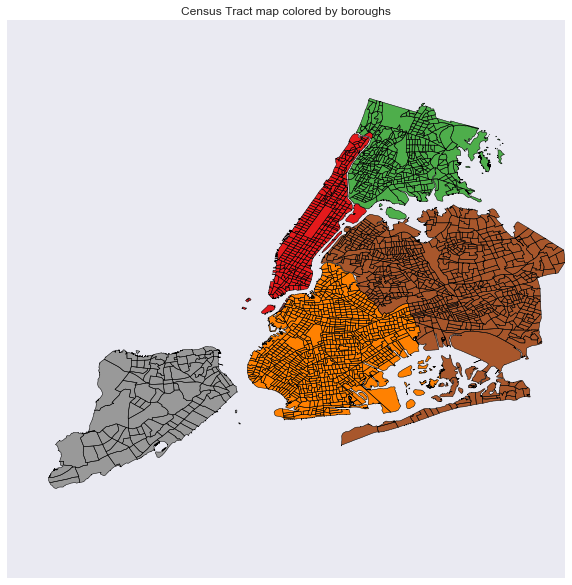

In [11]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [8]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [9]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/Users/christianrosado/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


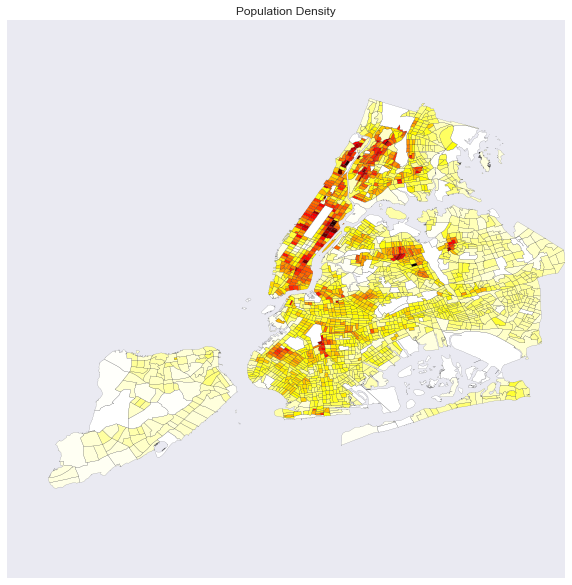

In [10]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [79]:
df_bike_monthly=DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                                ...    
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368  ...    
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910  ...    
2013-09-30  2878  5258   9814  3739  7837  3206  2747  3590  4618  2885  ...    
2013-10-31  2920  4409  10456  3520  8928  3237  2530  3909  4169  2542  ...    
2013-11-30  1883  2731   6384  2446  5201  2085  1415  2727  3146  1539  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-07-31     0     0     0     0     0     0     0     0     0     0  
2013-08-31     0     0     0     0     0     0     0     0     0     0  
2013-09-30     0     0     0     0     0     0     0     0     0     0  
2013-10-31     0     0     0     0     0     0     0     0     0     0  
2013-11-30     0     0     0     0     0     0     0     0     0     0  

[5 rows x 543 columns]

In [69]:
df_bike_monthly.index.month

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6], dtype=int32)

In [89]:
df_bike_winter = df_bike_monthly[(df_bike_monthly.index.month <= 3) | (df_bike_monthly.index.month >= 12)]
df_bike_winter

1000  1001  1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                               ...    
2013-12-31  1299  1650  4081  1686  3046  1575   830  1890  2048  1009  ...    
2014-01-31   956  1337  3178  1251  1920  1130   477  1412  1082   681  ...    
2014-02-28   650   960  2920   676  1808   933   508  1045   963   530  ...    
2014-03-31   804  1559  5102  1441  2643  1477   849  2004  2105   880  ...    
2014-12-31  1052  1304  4501  1783  2985  2091   779  2108  1636   878  ...    
2015-01-31   833     0  3186  1248  1992  1429   442  1499  1366   619  ...    
2015-02-28   562     0  2130   913  1363  1140   356  1023   891   447  ...    
2015-03-31  1012     0  3574  1401  2201  2047   617  1867  1505   769  ...    
2015-12-31  1873  2502  7101  2678  3968  3492  1420  3620  3251  1654  ...    
2016-01-31  1031  1669  4533  1847  2304  1943   656  2485     0   935  ...    
2016-02-29  1200  1951  4913  2088  2503  2224   859  2814     0  1082  ...    
2016-03-31  1891  3181  7721  2529  4586  3692  1633  4015     0  1894  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-12-31     0     0     0     0     0     0     0     0     0     0  
2014-01-31     0     0     0     0     0     0     0     0     0     0  
2014-02-28     0     0     0     0     0     0     0     0     0     0  
2014-03-31     0     0     0     0     0     0     0     0     0     0  
2014-12-31     0     0     0     0     0     0     0     0     0     0  
2015-01-31     0     0     0     0     0     0     0     0     0     0  
2015-02-28     0     0     0     0     0     0     0     0     0     0  
2015-03-31     0     0     0     0     0     0     0     0     0     0  
2015-12-31     0     0     0     0     0     0     0     0     0     0  
2016-01-31     0     0     0     0     0     0     0     0     0     0  
2016-02-29     0     0     0     0     0     0     0     0     0     0  
2016-03-31     0     0     0     0     0     0     0     0     0     0  

[12 rows x 543 columns]

In [90]:
df_bike_summer = df_bike_monthly[(df_bike_monthly.index.month >= 6) * (df_bike_monthly.index.month <= 8)]
df_bike_summer

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                                ...    
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368  ...    
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910  ...    
2014-06-30  2048  3306   9626  3515  7255  2942  1917  3702  3694  2422  ...    
2014-07-31  2252  3216   9825  3509  7014  3224  2195  3732  4042  2268  ...    
2014-08-31  2179  3004  10196  3573  7328  3311  2213  4078  4011  2168  ...    
2015-06-30  2309     0   9457  3426  5859  4763  1809  5190  2695  2116  ...    
2015-07-31  2556  3831  10341  3958  6424  5397  2185  5688  4846  2743  ...    
2015-08-31  2640  3799  11801  4288  7031  5417  2470  6306  4583  2838  ...    
2016-06-30  3399  7370  10130  4566  7420  5775  2429  6037     0  3054  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-07-31     0     0     0     0     0     0     0     0     0     0  
2013-08-31     0     0     0     0     0     0     0     0     0     0  
2014-06-30     0     0     0     0     0     0     0     0     0     0  
2014-07-31     0     0     0     0     0     0     0     0     0     0  
2014-08-31     0     0     0     0     0     0     0     0     0     0  
2015-06-30     0     0     0     0     0     0     0     0     0     0  
2015-07-31     0     0     0     0     0     0     0     0     0     0  
2015-08-31     0     0     0     0     0     0     0     0     0     0  
2016-06-30  1036     0     0  7009  1109   665  2470   178   852   615  

[9 rows x 543 columns]

### Time Series Aanalysis

(-200, 16000)

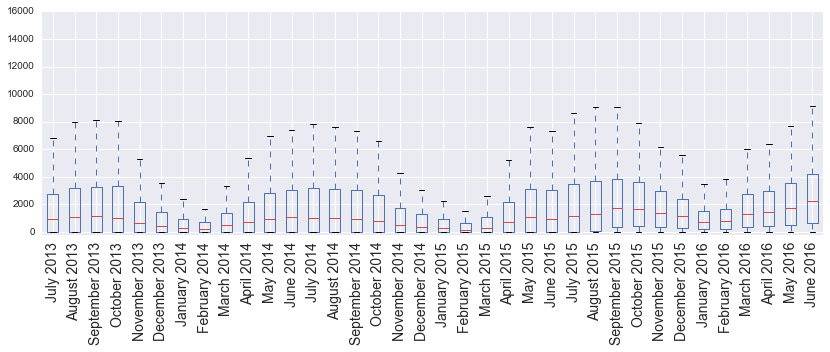

In [93]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

/Users/christianrosado/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


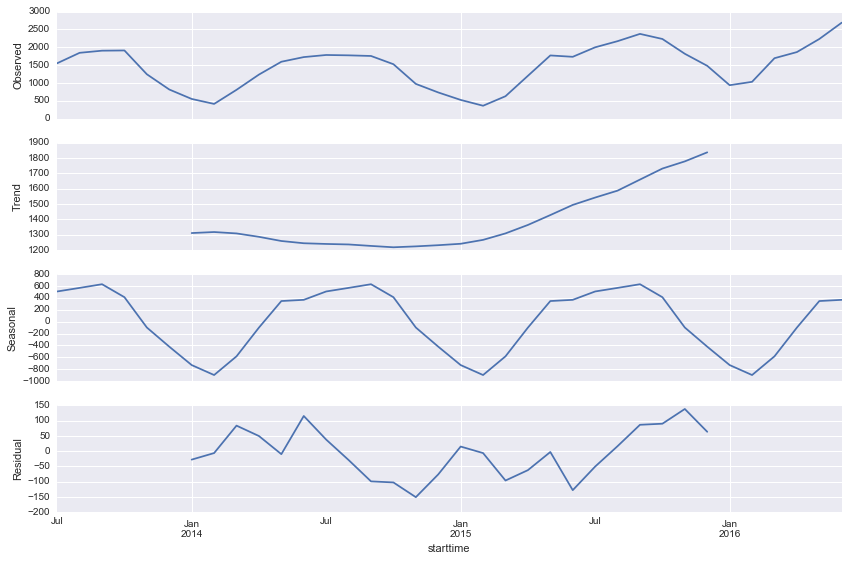

In [82]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [83]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

lat        lon
1000  40.753231 -73.970325
1001  40.749718 -74.002950
1002  40.730287 -73.990765
1003  40.718939 -73.992663
1004  40.734927 -73.992005

### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [84]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

lat        lon                         lonlat  \
1000  40.753231 -73.970325    (-73.97032517, 40.75323098)   
1001  40.749718 -74.002950  (-74.002950346, 40.749717753)   
1002  40.730287 -73.990765     (-73.9907647, 40.73028666)   
1003  40.718939 -73.992663    (-73.99266288, 40.71893904)   
1004  40.734927 -73.992005    (-73.99200509, 40.73492695)   

                                     geometry  
1000         POINT (-73.97032517 40.75323098)  
1001  POINT (-74.00295034600001 40.749717753)  
1002          POINT (-73.9907647 40.73028666)  
1003         POINT (-73.99266288 40.71893904)  
1004   POINT (-73.99200509000001 40.73492695)

### Intersect the two geometries

In [85]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [86]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [91]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve']=df_bike_monthly.sum()
station_id['WinterAve']=df_bike_winter.sum()
station_id['SummerAve']=df_bike_summer.sum()

In [92]:
station_id.head()

lat        lon                         lonlat  \
1000  40.753231 -73.970325    (-73.97032517, 40.75323098)   
1001  40.749718 -74.002950  (-74.002950346, 40.749717753)   
1002  40.730287 -73.990765     (-73.9907647, 40.73028666)   
1003  40.718939 -73.992663    (-73.99266288, 40.71893904)   
1004  40.734927 -73.992005    (-73.99200509, 40.73492695)   

                                     geometry BoroCT2010  MonthlyAve  \
1000         POINT (-73.97032517 40.75323098)    1009000       69308   
1001  POINT (-74.00295034600001 40.749717753)    1009900      102824   
1002          POINT (-73.9907647 40.73028666)    1005700      273525   
1003         POINT (-73.99266288 40.71893904)    1001800      101949   
1004   POINT (-73.99200509000001 40.73492695)    1006100      184044   

      WinterAve  SummerAve  
1000      13163      22422  
1001      16113      32869  
1002      52940      87375  
1003      19541      33018  
1004      31319      59890

### Add the monthly average rides to the CT shapefile 

In [144]:
# use the 
temp=station_id[['MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [145]:
# add winter ave
tempW=station_id[['WinterAve']]
tempW['station_id']=station_id.index
tempW.index=station_id['BoroCT2010']
ct_shape_WinterAve=ct_shape.join(tempW)
ct_shape_WinterAve.fillna(0,inplace=True)

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [146]:
# add summer ave
tempM=station_id[['SummerAve']]
tempM['station_id']=station_id.index
tempM.index=station_id['BoroCT2010']
ct_shape_SummerAve=ct_shape.join(tempM)
ct_shape_SummerAve.fillna(0,inplace=True)

/Users/christianrosado/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


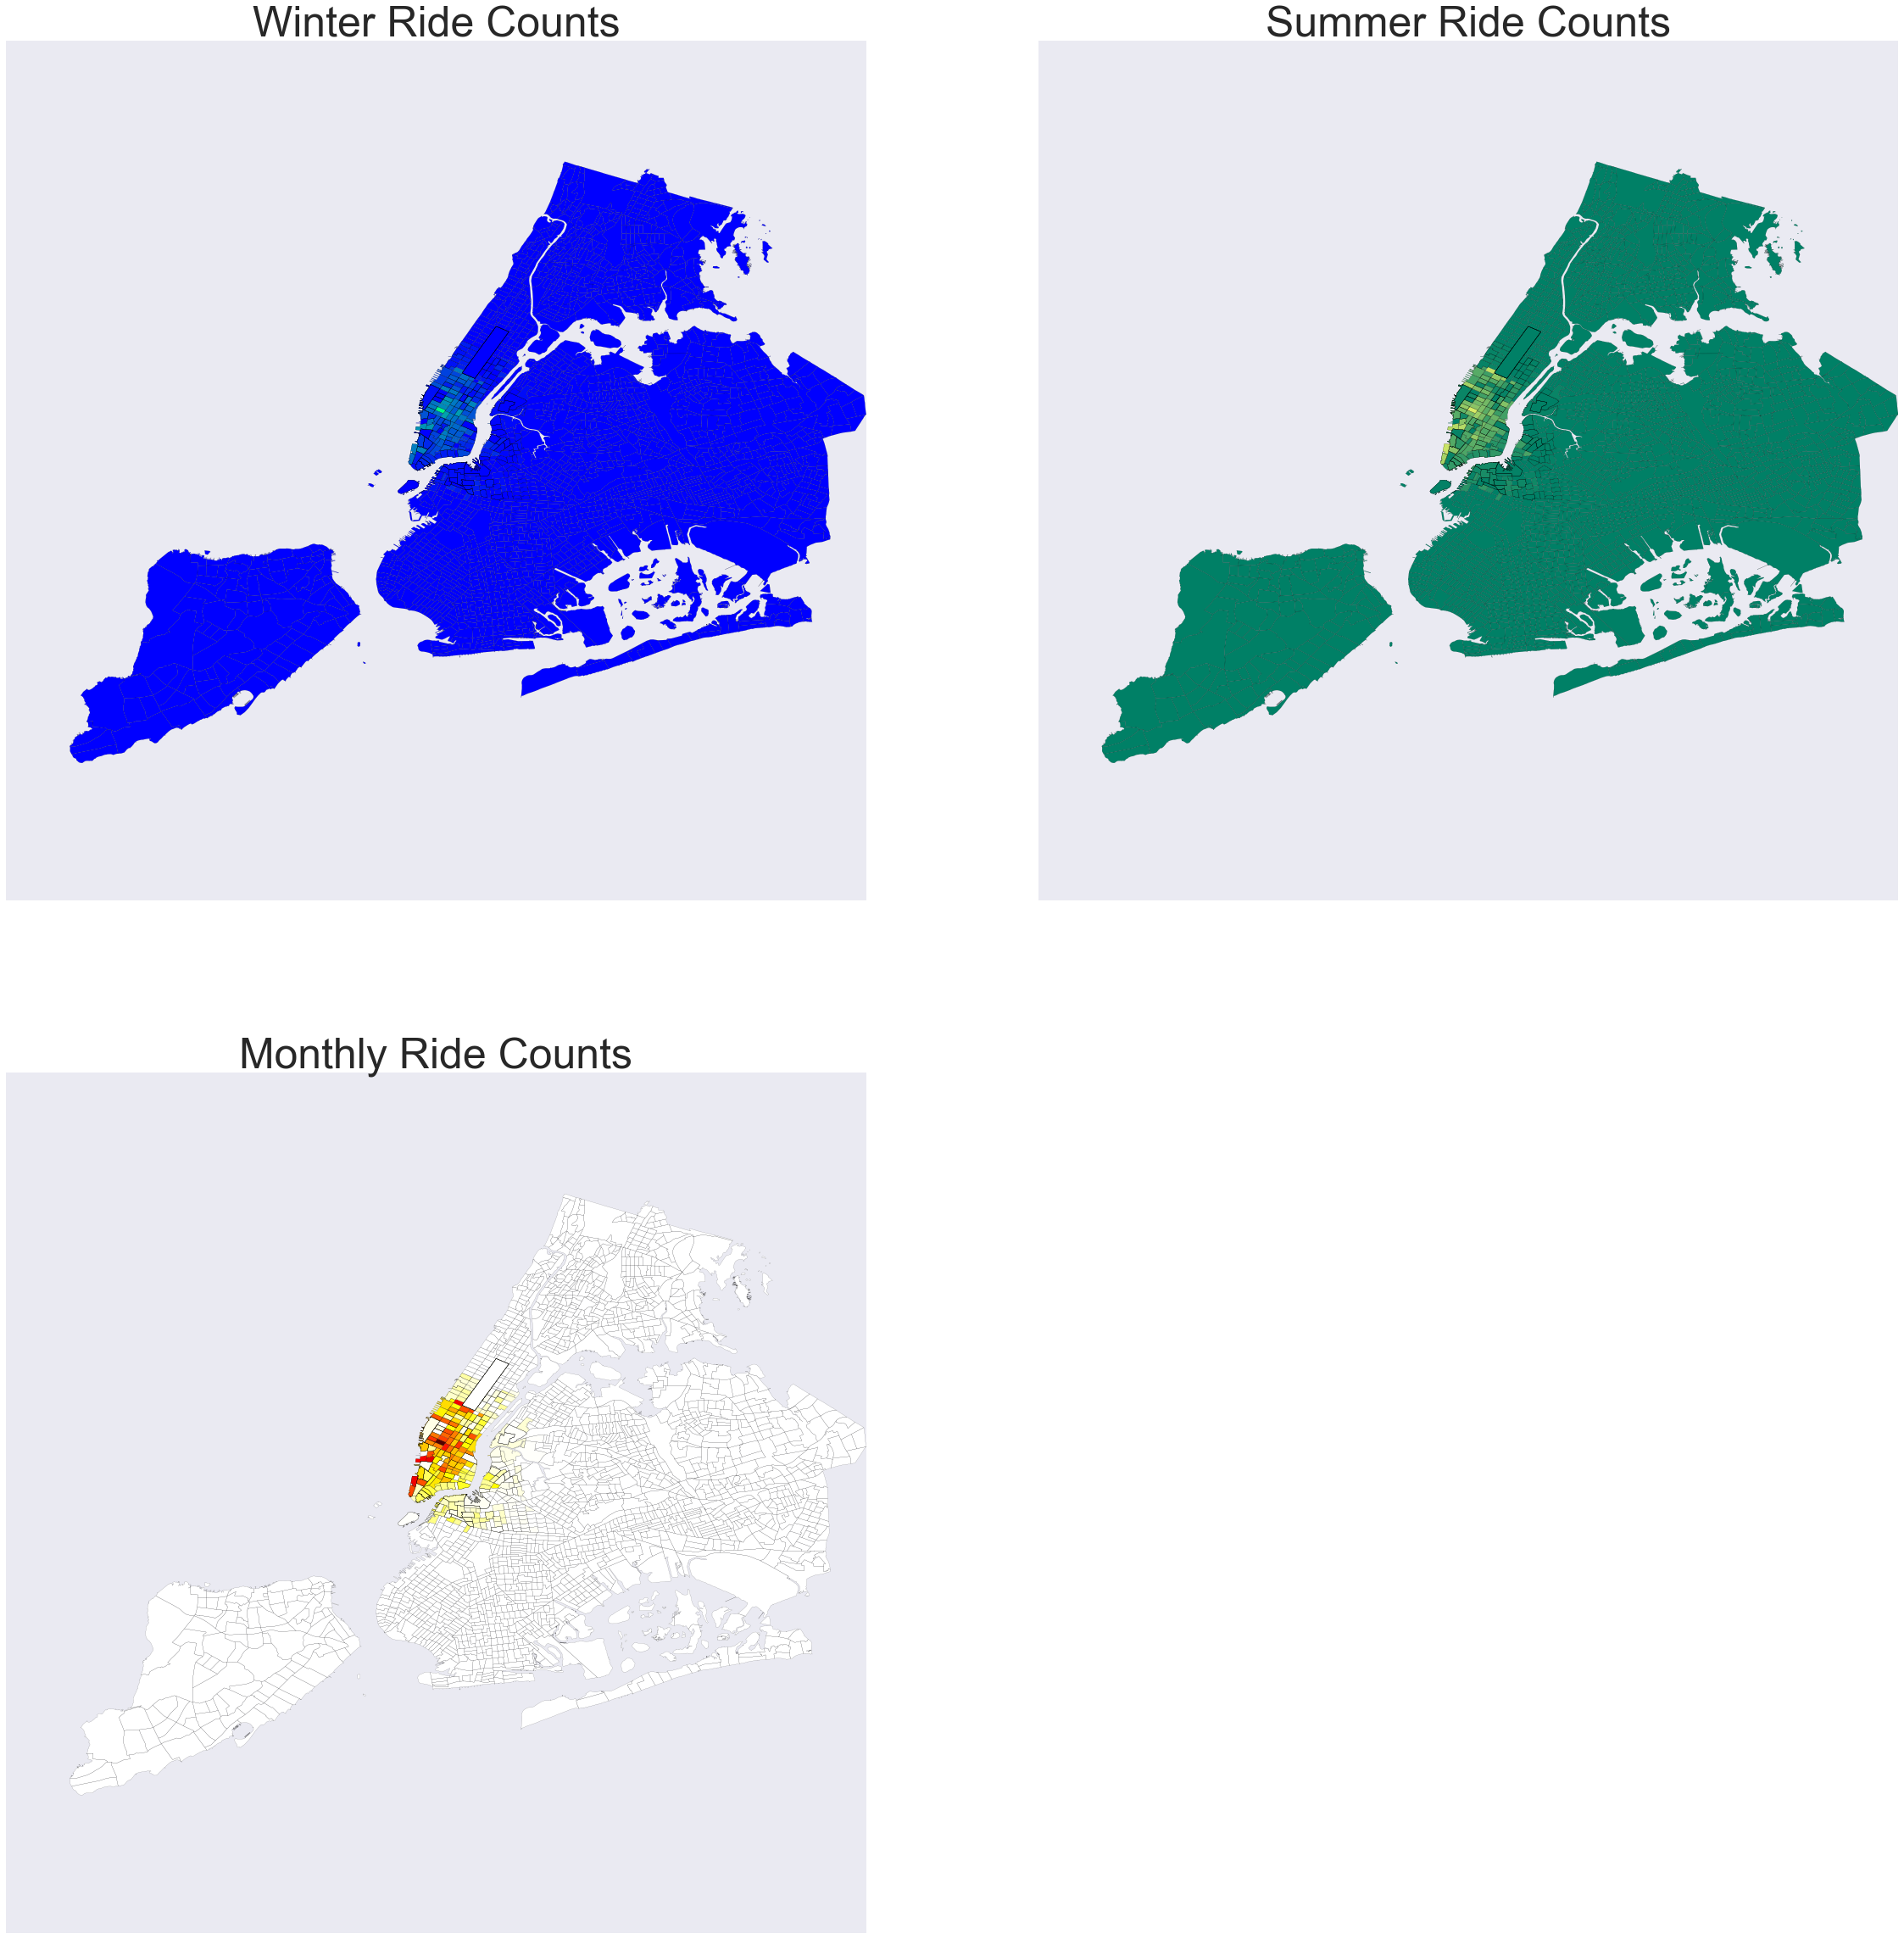

In [169]:
f, ax = plt.subplots(figsize=(40,40))

ax1 = plt.subplot(223)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ct_shape_MonthlyAve.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1, ax=ax1)
plt.title("Monthly Ride Counts", fontsize=50)

ax2 = plt.subplot(221)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_WinterAve.plot(column='WinterAve',colormap='winter',alpha=1,linewidth=0.1, ax=ax2)
plt.title("Winter Ride Counts", fontsize=50)

ax3 = plt.subplot(222)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ct_shape_SummerAve.plot(column='SummerAve',colormap='summer',alpha=1,linewidth=0.1, ax=ax3)
plt.title("Summer Ride Counts", fontsize=50)

### Removing the CTs that are out of zoom boundries

In [139]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [153]:
ct_shape_WinterAve_Zoom=(ct_shape_WinterAve[ct_shape_WinterAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [141]:
ct_shape_SummerAve_Zoom=(ct_shape_SummerAve[ct_shape_SummerAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [154]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides 

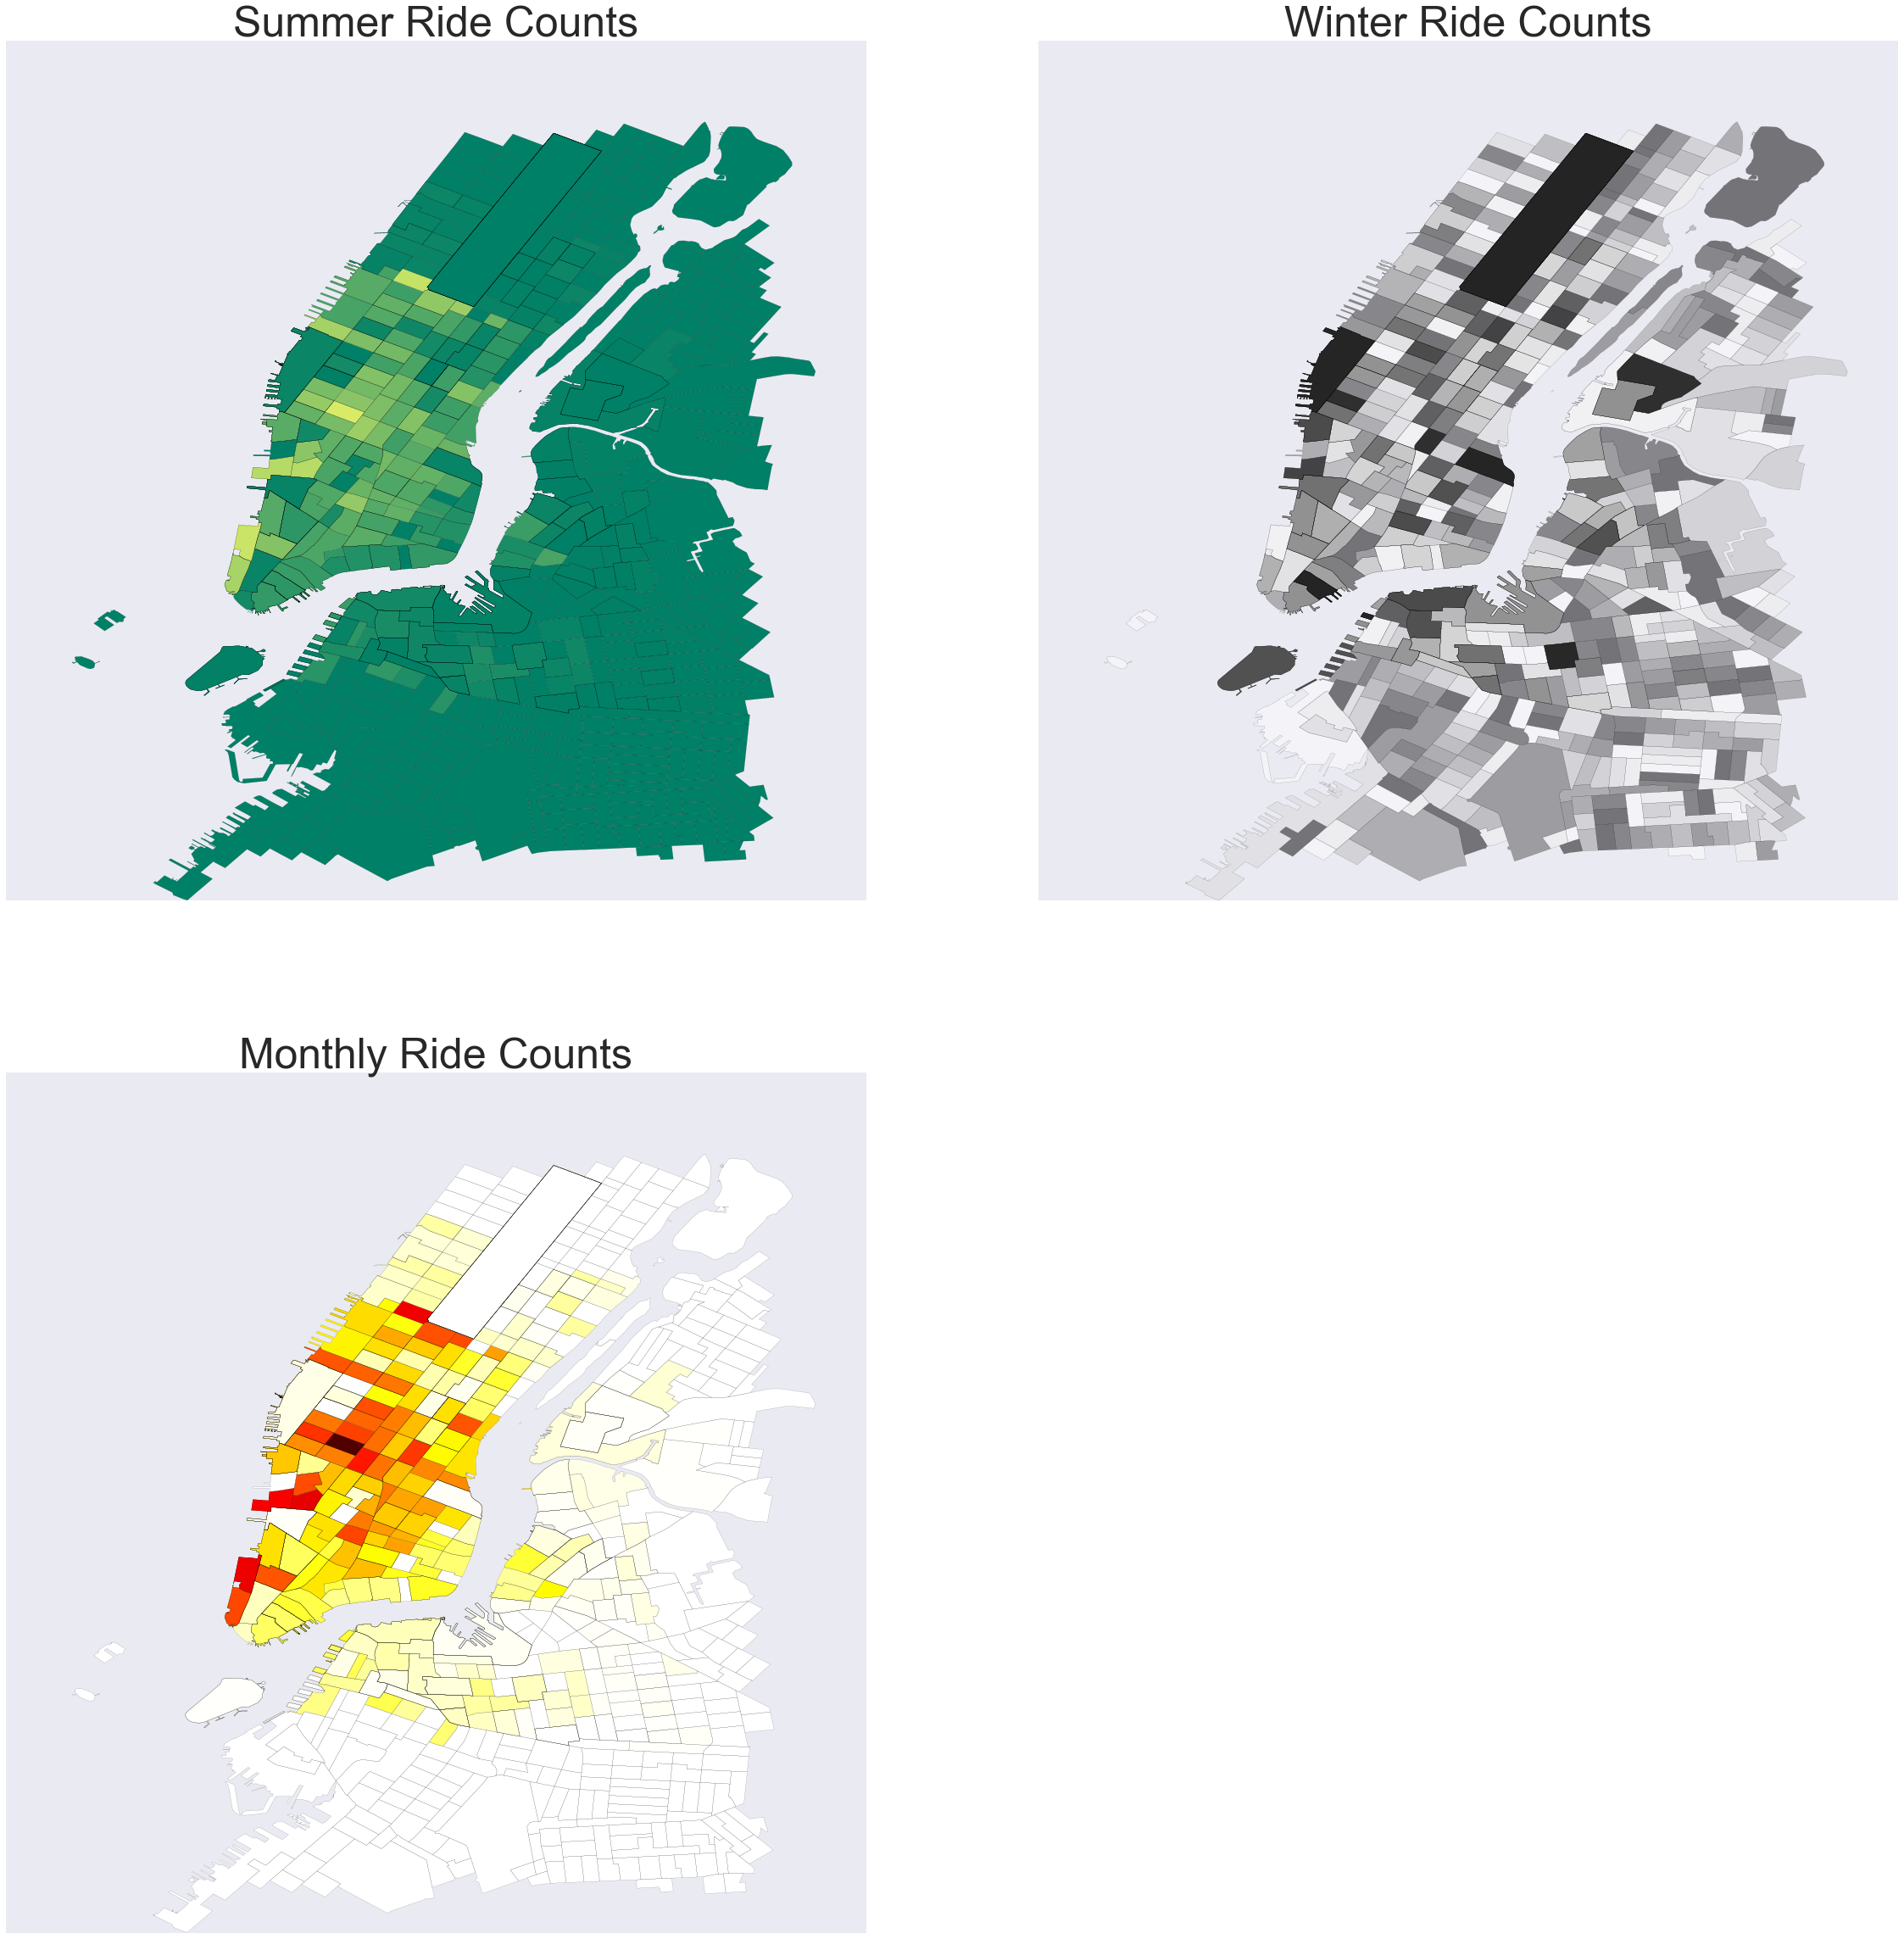

In [215]:
f, ax = plt.subplots(figsize=(40,40))

ax1 = plt.subplot(223)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
plt.title("Monthly Ride Counts", fontsize=50)

ax2 = plt.subplot(222)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_WinterAve_Zoom.plot(linewidth=0.1,ax=ax2)
plt.title("Winter Ride Counts", fontsize=50)

ax3 = plt.subplot(221)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ct_shape_SummerAve_Zoom.plot(column='SummerAve',colormap='summer',alpha=1,linewidth=0.1,ax=ax3)
plt.title("Summer Ride Counts", fontsize=50)

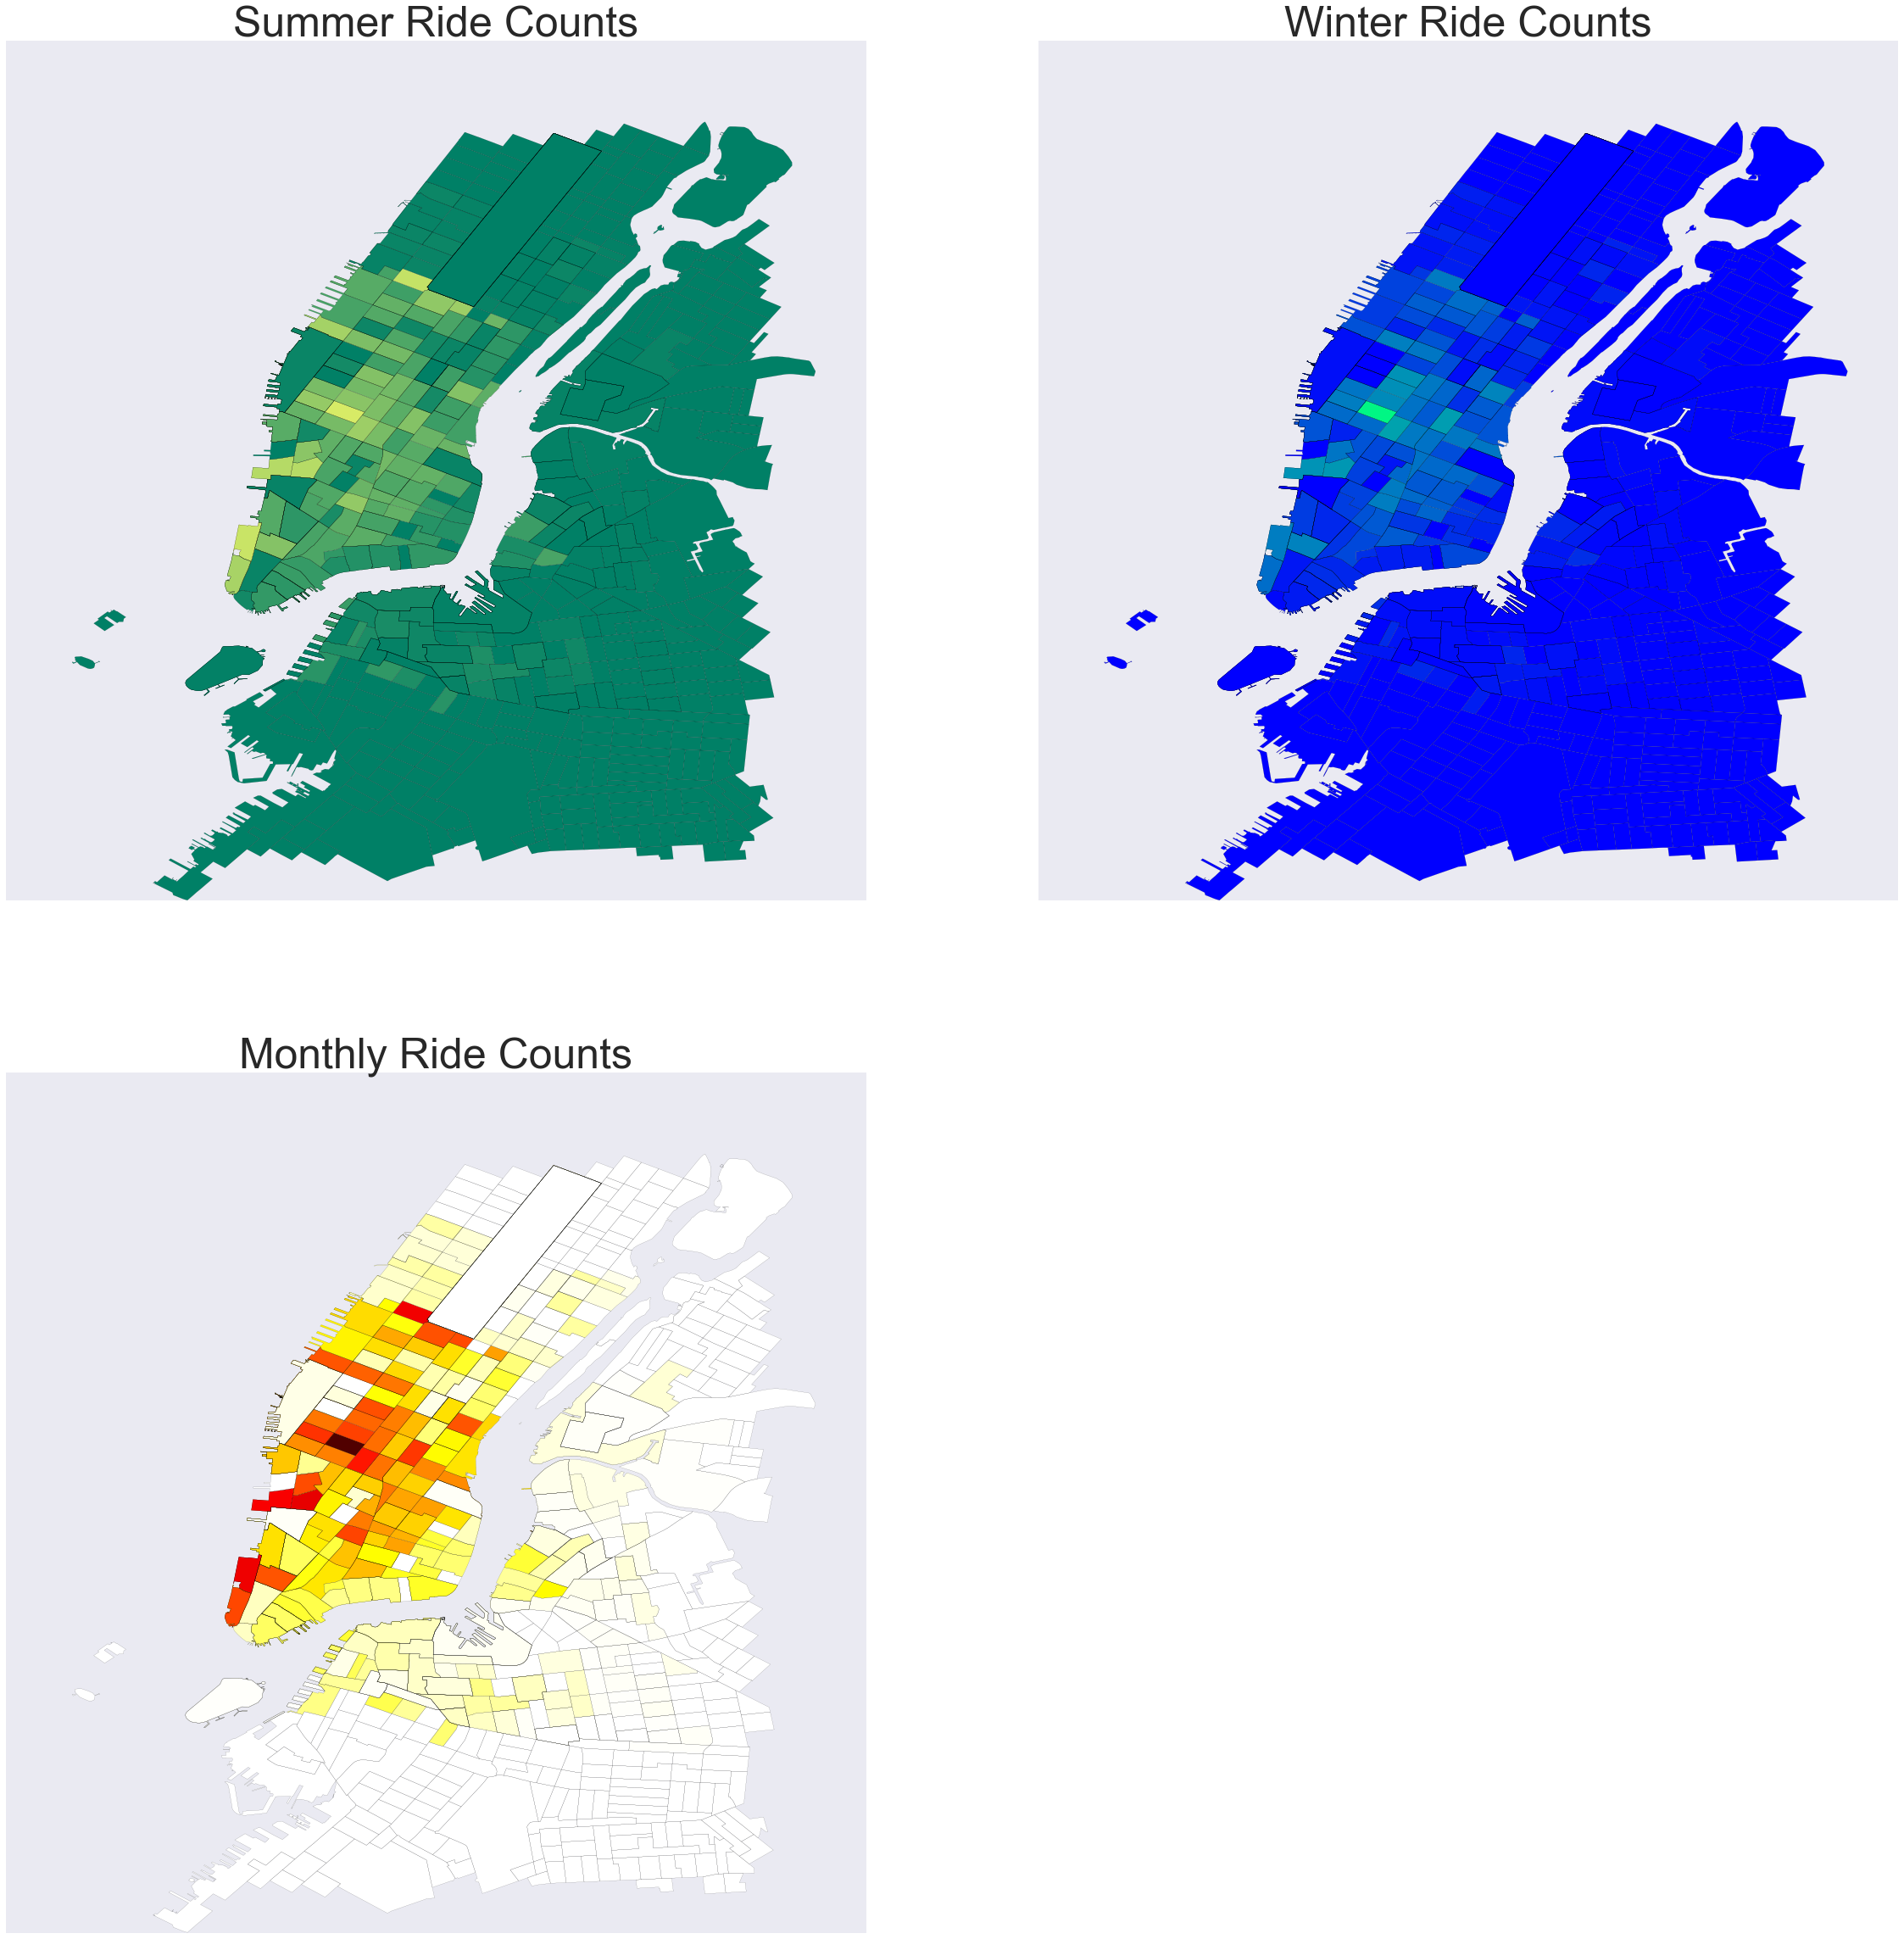

In [207]:
f, ax = plt.subplots(figsize=(40,40))

ax1 = plt.subplot(223)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax1)
plt.title("Monthly Ride Counts", fontsize=50)

ax2 = plt.subplot(222)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_WinterAve_Zoom.plot(column='WinterAve',colormap='winter',alpha=1,linewidth=0.1,ax=ax2)
plt.title("Winter Ride Counts", fontsize=50)

ax3 = plt.subplot(221)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ct_shape_SummerAve_Zoom.plot(column='SummerAve',colormap='summer',alpha=1,linewidth=0.1,ax=ax3)
plt.title("Summer Ride Counts", fontsize=50)

### Export Shapefile CTs in the CitiBike Zone

In [182]:
path='Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

ct_shape_WinterAve_Zoom.to_file(path)

ct_shape_SummerAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [171]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [183]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [184]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [185]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [186]:
Wmatrix, ids = qW_CT.full()

In [187]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [188]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [189]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)

WinterRide=ct_shape_WinterAve_Zoom.WinterAve
WinterRideLag=ps.lag_spatial(qW_CT, WinterRide)

SummerRide=ct_shape_SummerAve_Zoom.SummerAve
SummerRideLag=ps.lag_spatial(qW_CT, SummerRide)

#### Create Quantiles for maping

In [208]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
print 'Monthly \n', MonthlyRideLagQ10, '\n'

SummerRideLagQ10 = ps.Quantiles(SummerRideLag, k=10)
print 'Summer \n', SummerRideLagQ10

WinterRideLagQ10 = ps.Quantiles(WinterRideLag, k=10)
print 'Winter \n', WinterRideLagQ10, '\n'

Monthly 
                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=      0.000               140
     0.000 < x[i] <=    237.571                21
   237.571 < x[i] <=   4167.561                78
  4167.561 < x[i] <=  10026.857                80
 10026.857 < x[i] <=  17493.404                79
 17493.404 < x[i] <=  26977.053                80
 26977.053 < x[i] <=  58126.278                79
 58126.278 < x[i] <=  81788.042                80
 81788.042 < x[i] <=  96870.015                79
 96870.015 < x[i] <= 151983.357                80 

Summer 
                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    49.286                 2
   49.286 < x[i] <=   882.900                78
  882.900 < x[i] <=  2346.833                80
 2346.833 < x[i] <=  5645.067                84
 5645.067 < x[i] <=  8593.933            

#### Map the monthly rides lag

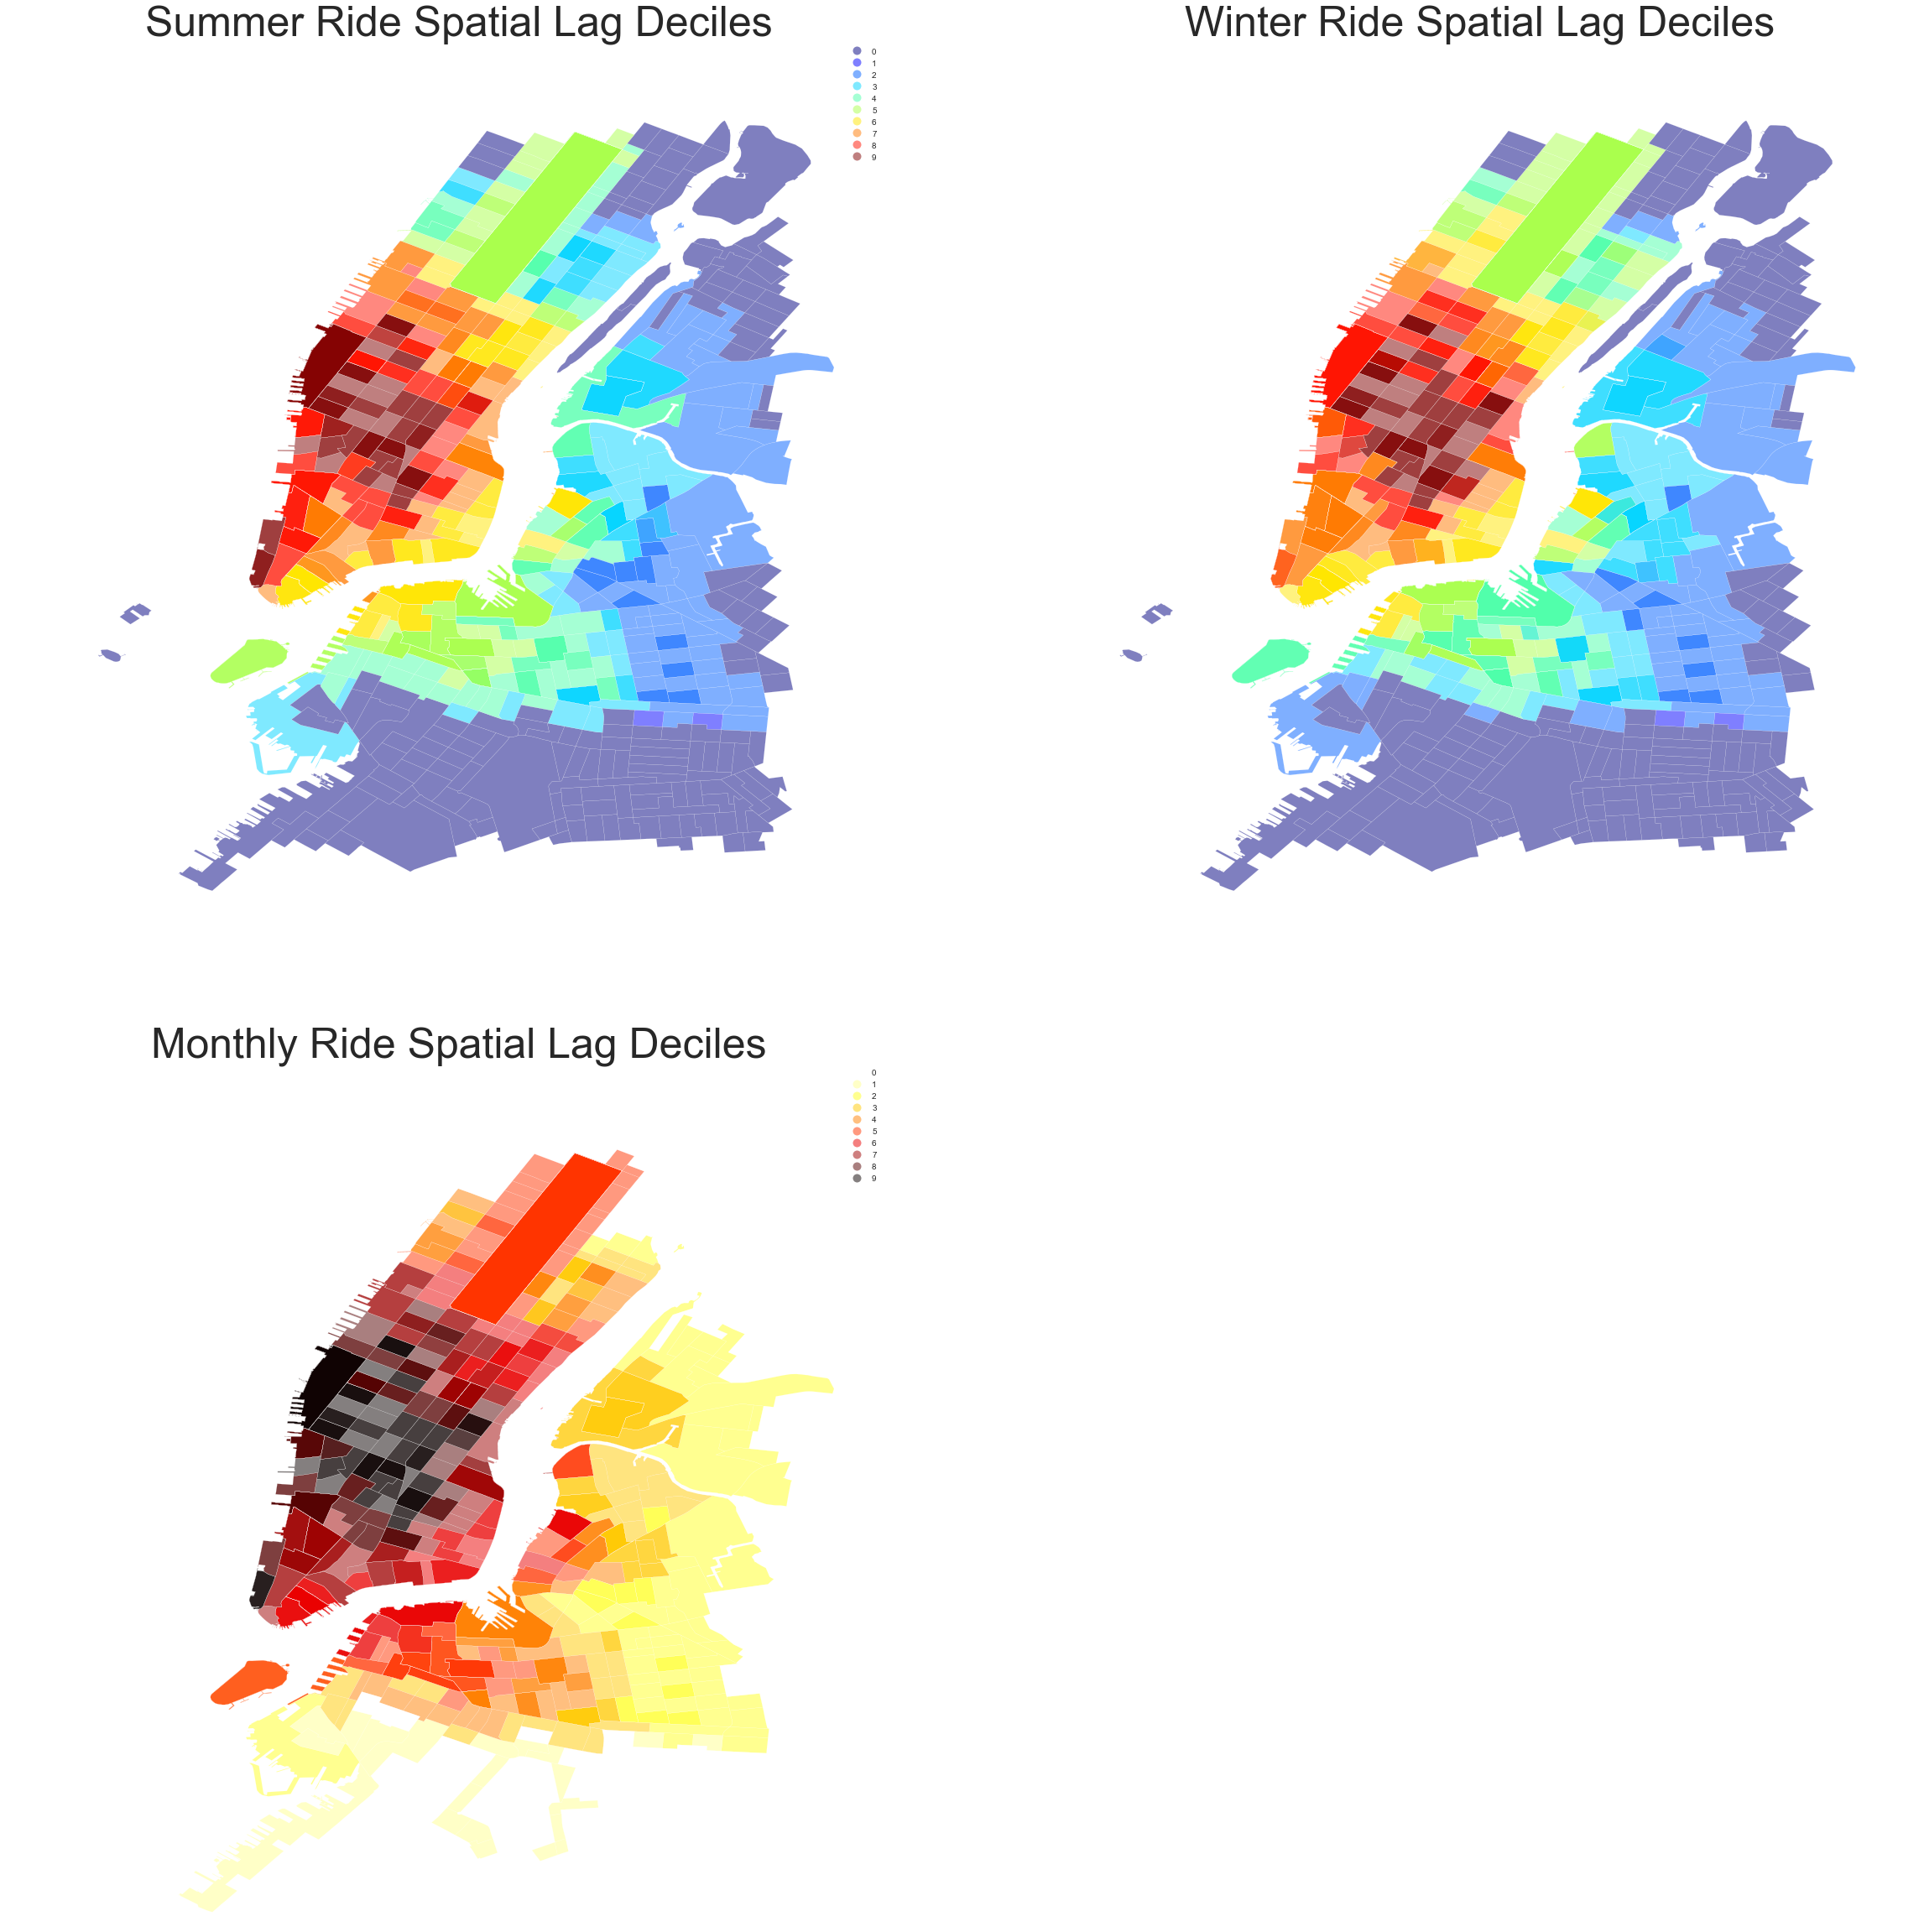

In [212]:
f, ax = plt.subplots(figsize=(40, 40))

ax1 = plt.subplot(223)
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles", fontsize=50)

ax2 = plt.subplot(222)
ct_shape_WinterAve_Zoom.assign(cl=WinterRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='jet', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=False)
ax2.set_axis_off()
plt.title("Winter Ride Spatial Lag Deciles", fontsize=50)

ax3 = plt.subplot(221)
ct_shape_SummerAve_Zoom.assign(cl=SummerRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='jet', linewidth=0.1, ax=ax3, 
        edgecolor='white', legend=True)
ax3.set_axis_off()
plt.title("Summer Ride Spatial Lag Deciles", fontsize=50)


## Global  Spatial Autocorrelation

In [211]:
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
print 'Monthly', b,a 

b2,a2 = np.polyfit(SummerRide, SummerRideLag, 1)
print 'Summer', b2,a2 

b3,a3 = np.polyfit(WinterRide, WinterRideLag, 1)
print 'Winter', b3,a3 


Monthly 0.655636692829 12557.6370624
Summer 0.643354908154 4220.55529808
Winter 0.661894622507 2331.81764128


### Moran Scatterplot

(array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.]), <a list of 8 Text yticklabel objects>)

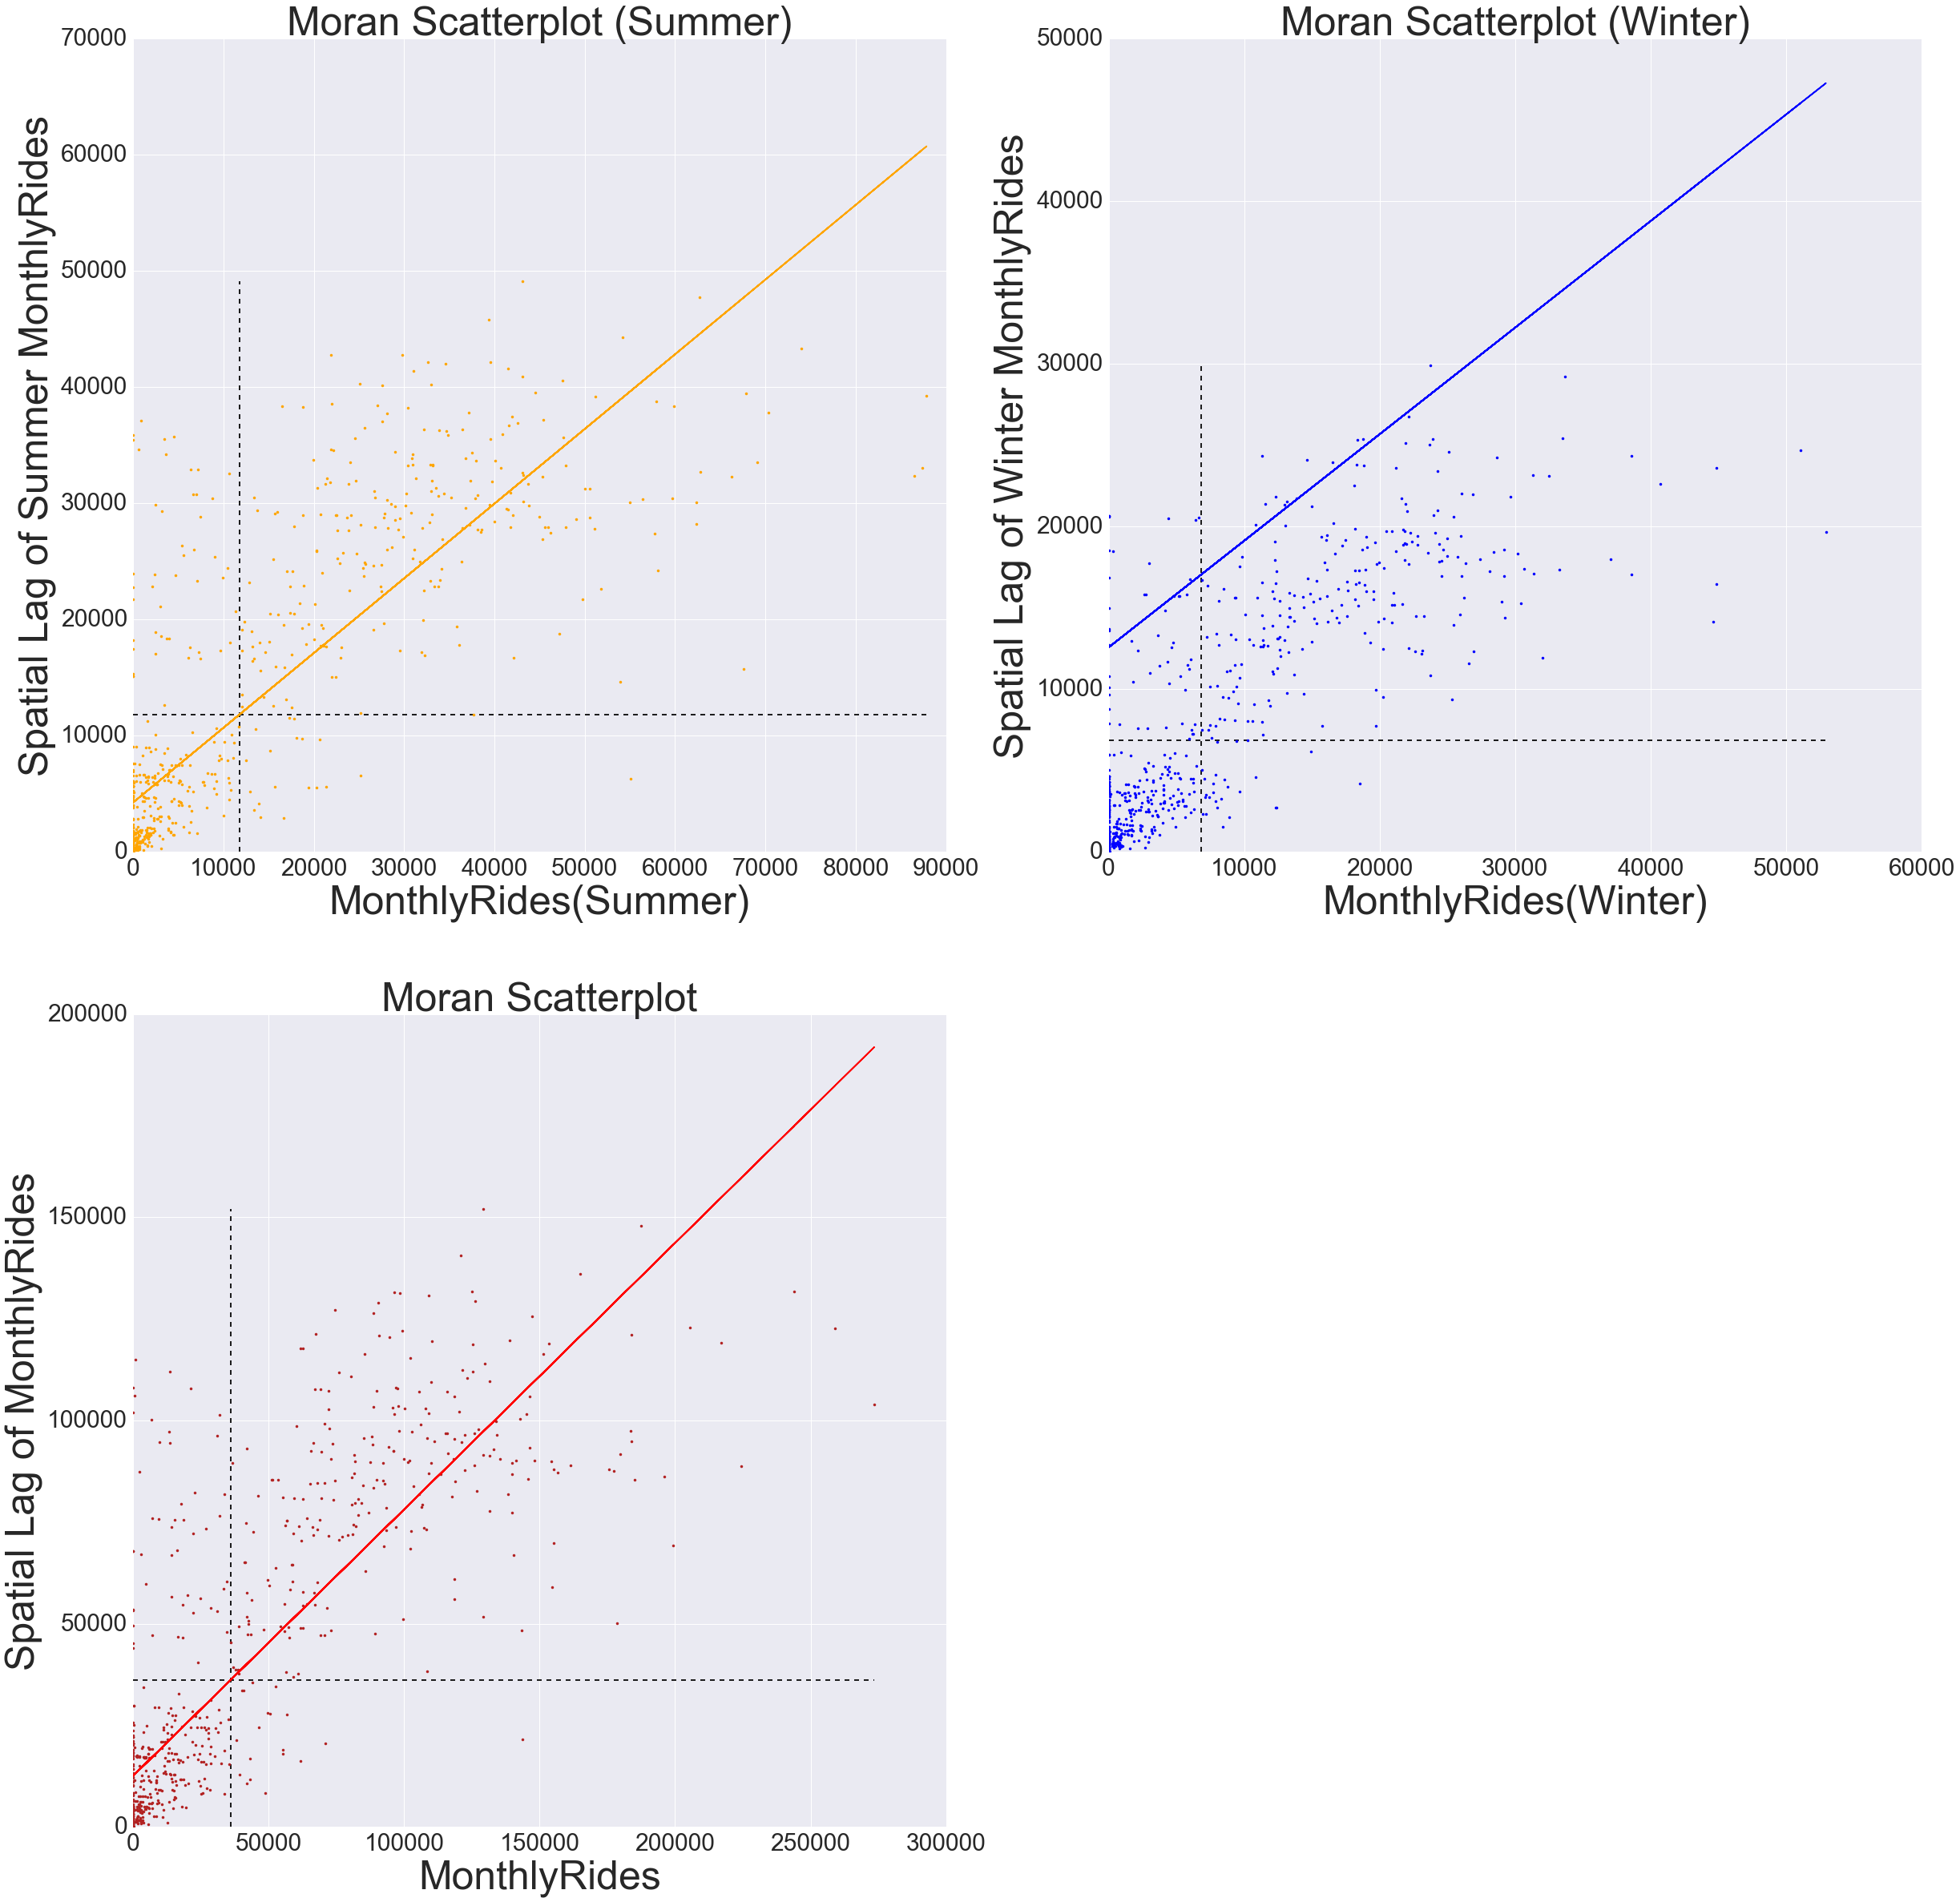

In [232]:
f, ax = plt.subplots(1, figsize=(40, 40))

ax1 = plt.subplot(223)
plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot', fontsize=50)
plt.ylabel('Spatial Lag of MonthlyRides', fontsize=50)
plt.xlabel('MonthlyRides', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 


ax1 = plt.subplot(222)
plt.plot(WinterRide, WinterRideLag, '.', color='blue')

 # dashed vert at mean of the last year's PCI
plt.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(WinterRide, a + b*WinterRide, 'b')
plt.title('Moran Scatterplot (Winter)', fontsize=50)
plt.ylabel('Spatial Lag of Winter MonthlyRides', fontsize=50)
plt.xlabel('MonthlyRides(Winter)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 


ax2 = plt.subplot(221)
plt.plot(SummerRide, SummerRideLag, '.', color='orange')

 # dashed vert at mean of the last year's PCI
plt.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(SummerRide, a2 + b2*SummerRide, 'orange')
plt.title('Moran Scatterplot (Summer)', fontsize=50)
plt.ylabel('Spatial Lag of Summer MonthlyRides', fontsize=50)
plt.xlabel('MonthlyRides(Summer)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30)  

### Moran's I

In [233]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)

I_WinterRide = ps.Moran(WinterRide, qW_CT)

I_SummerRide = ps.Moran(SummerRide, qW_CT)

In [234]:
I_MonthlyRide.I, I_MonthlyRide.p_sim

I_WinterRide.I, I_WinterRide.p_sim

I_SummerRide.I, I_SummerRide.p_sim

(0.64353398667011008, 0.001)

Thus, the $I$ statistic is $0.656$ for this data, and has a very small $p$ value. 

In [235]:
I_MonthlyRide.sim[0:10]

I_WinterRide.sim[0:10]

I_SummerRide.sim[0:10]

array([ 0.01912571, -0.00285515, -0.02171935, -0.00867343, -0.00720566,
       -0.00840299, -0.0151659 ,  0.0139883 ,  0.01888889,  0.02357199])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [236]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

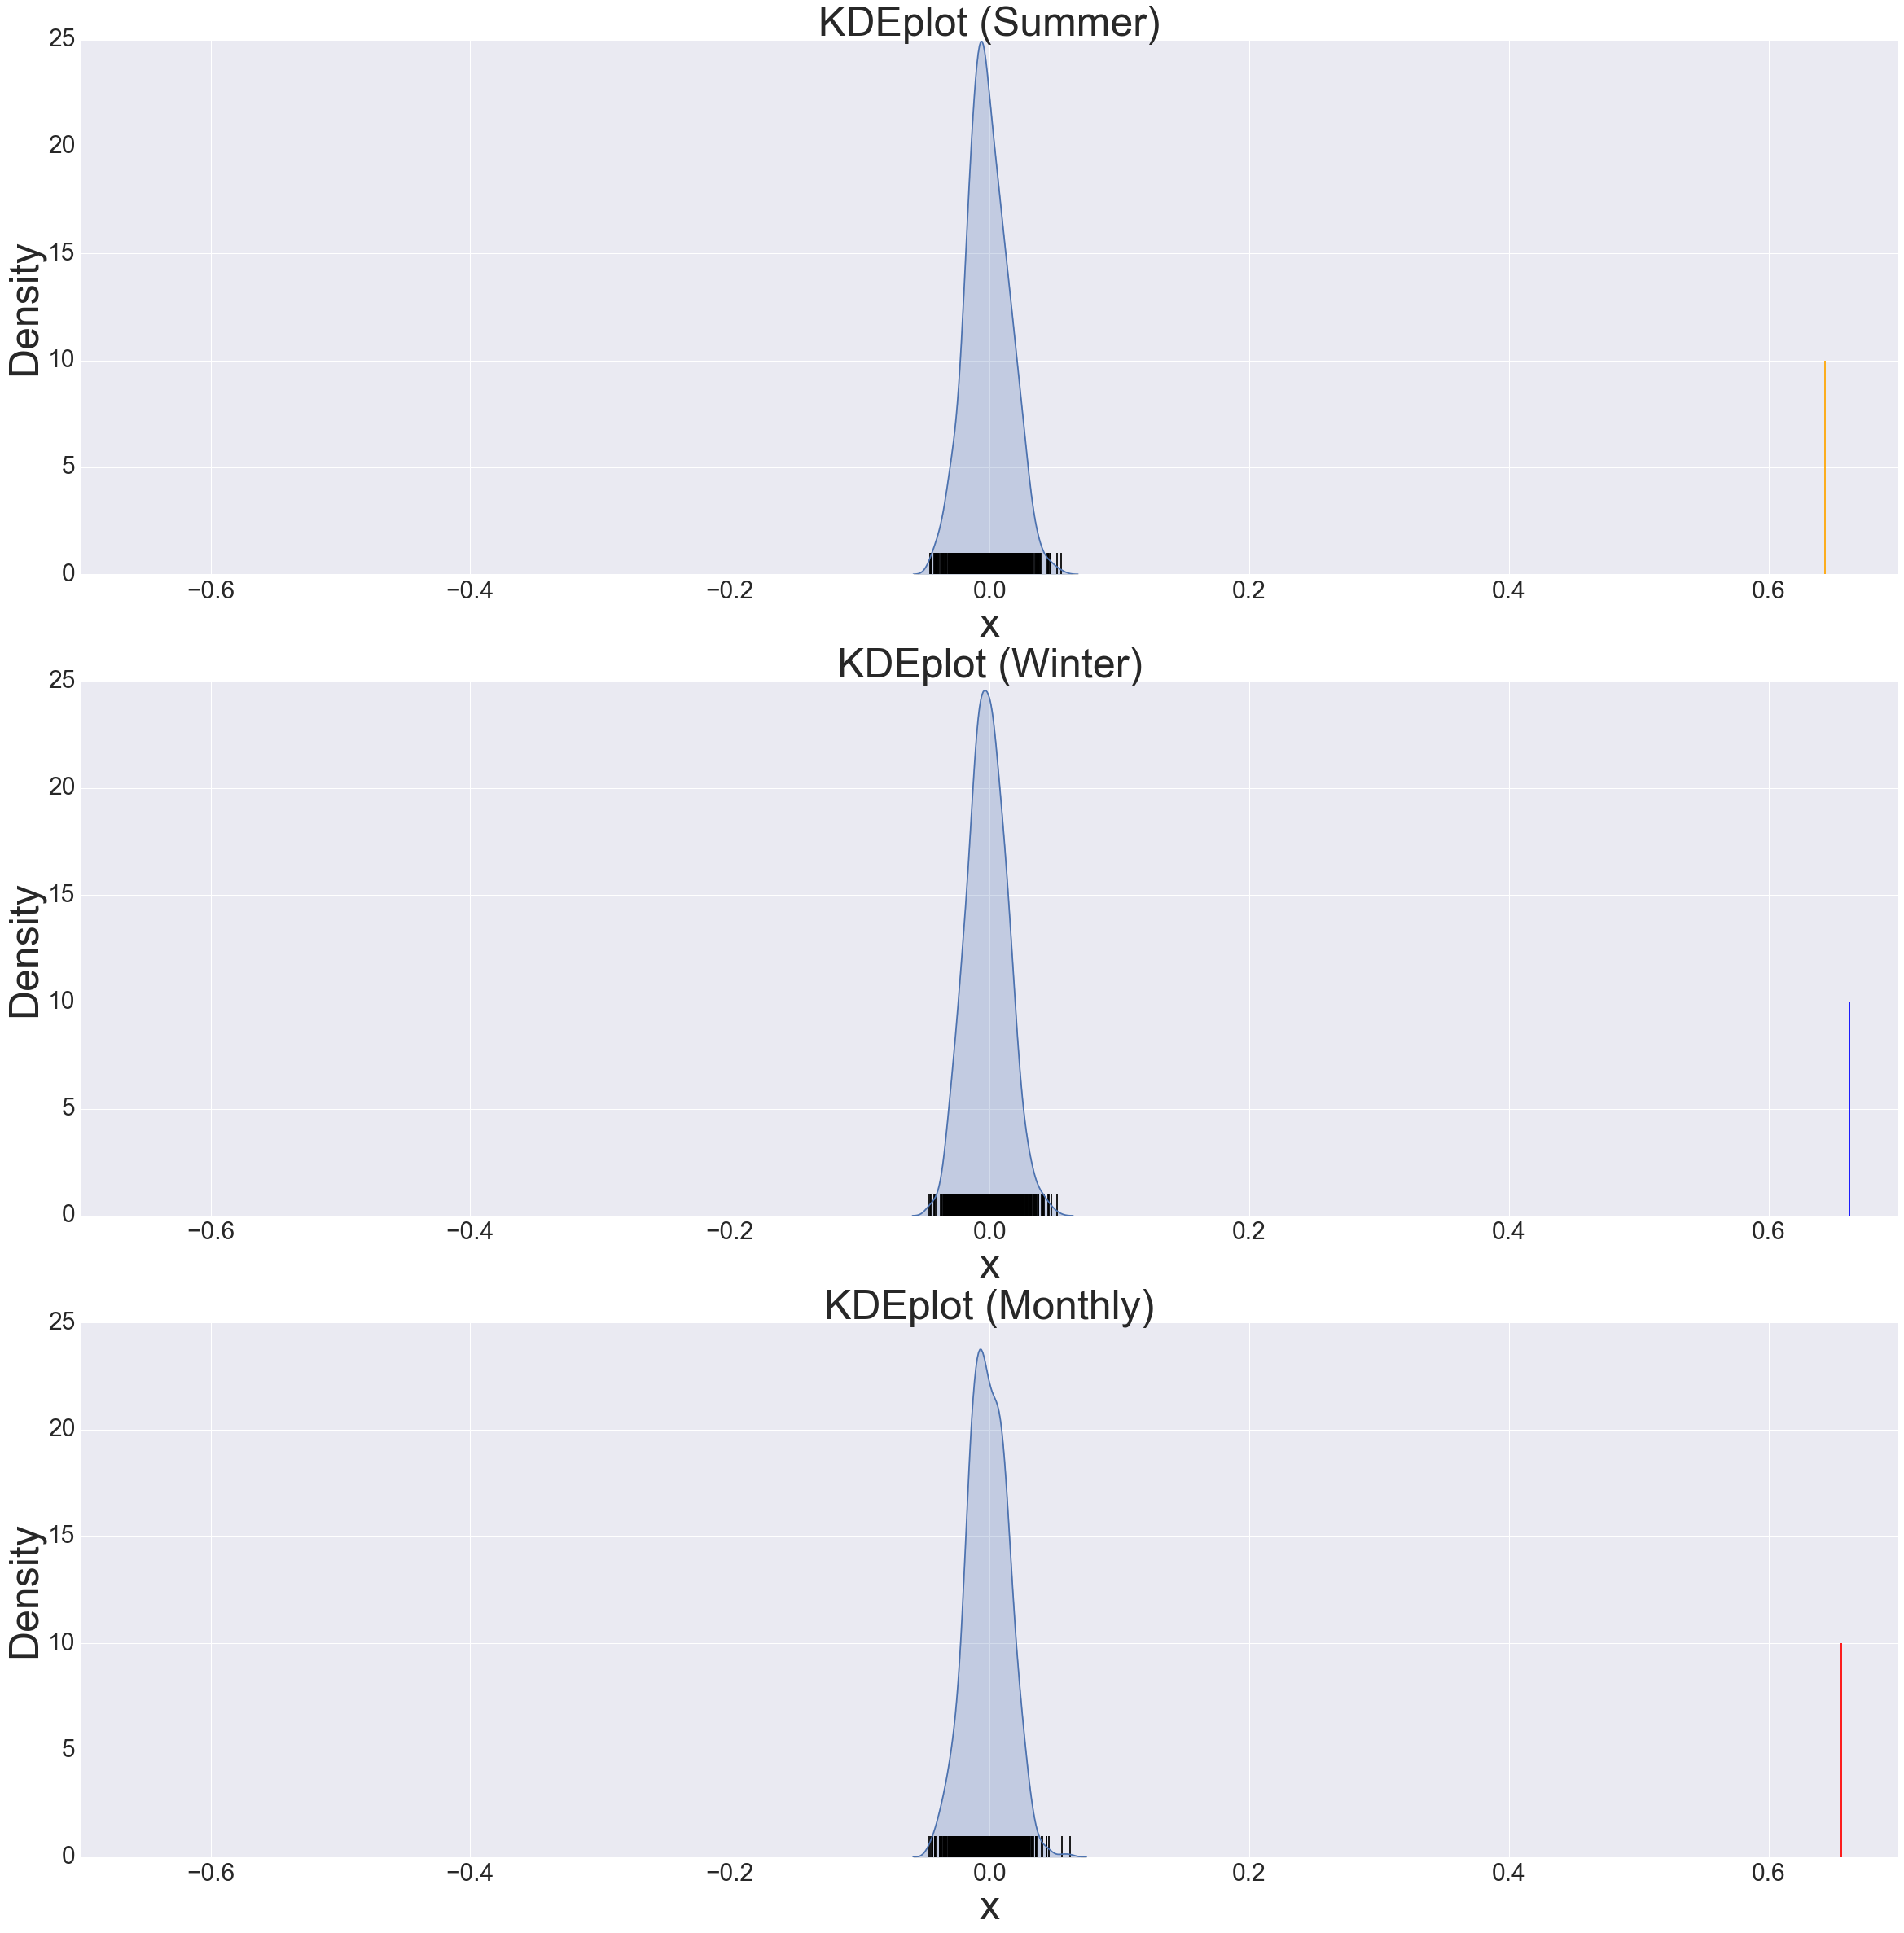

In [245]:
f, ax = plt.subplots(1, figsize=(40, 40))

ax1 = plt.subplot(313)
sns.kdeplot(I_MonthlyRide.sim, shade=True, ax=ax1)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('KDEplot (Monthly)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30)
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

ax2 = plt.subplot(312)
sns.kdeplot(I_WinterRide.sim, shade=True, ax=ax2)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.I, 0, 10, 'b')
plt.xlim([-.70, .70])
plt.title('KDEplot (Winter)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

ax3 = plt.subplot(311)
sns.kdeplot(I_SummerRide.sim, shade=True, ax=ax3)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.I, 0, 10, 'orange')
plt.xlim([-.70, .70])
plt.title('KDEplot (Summer)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

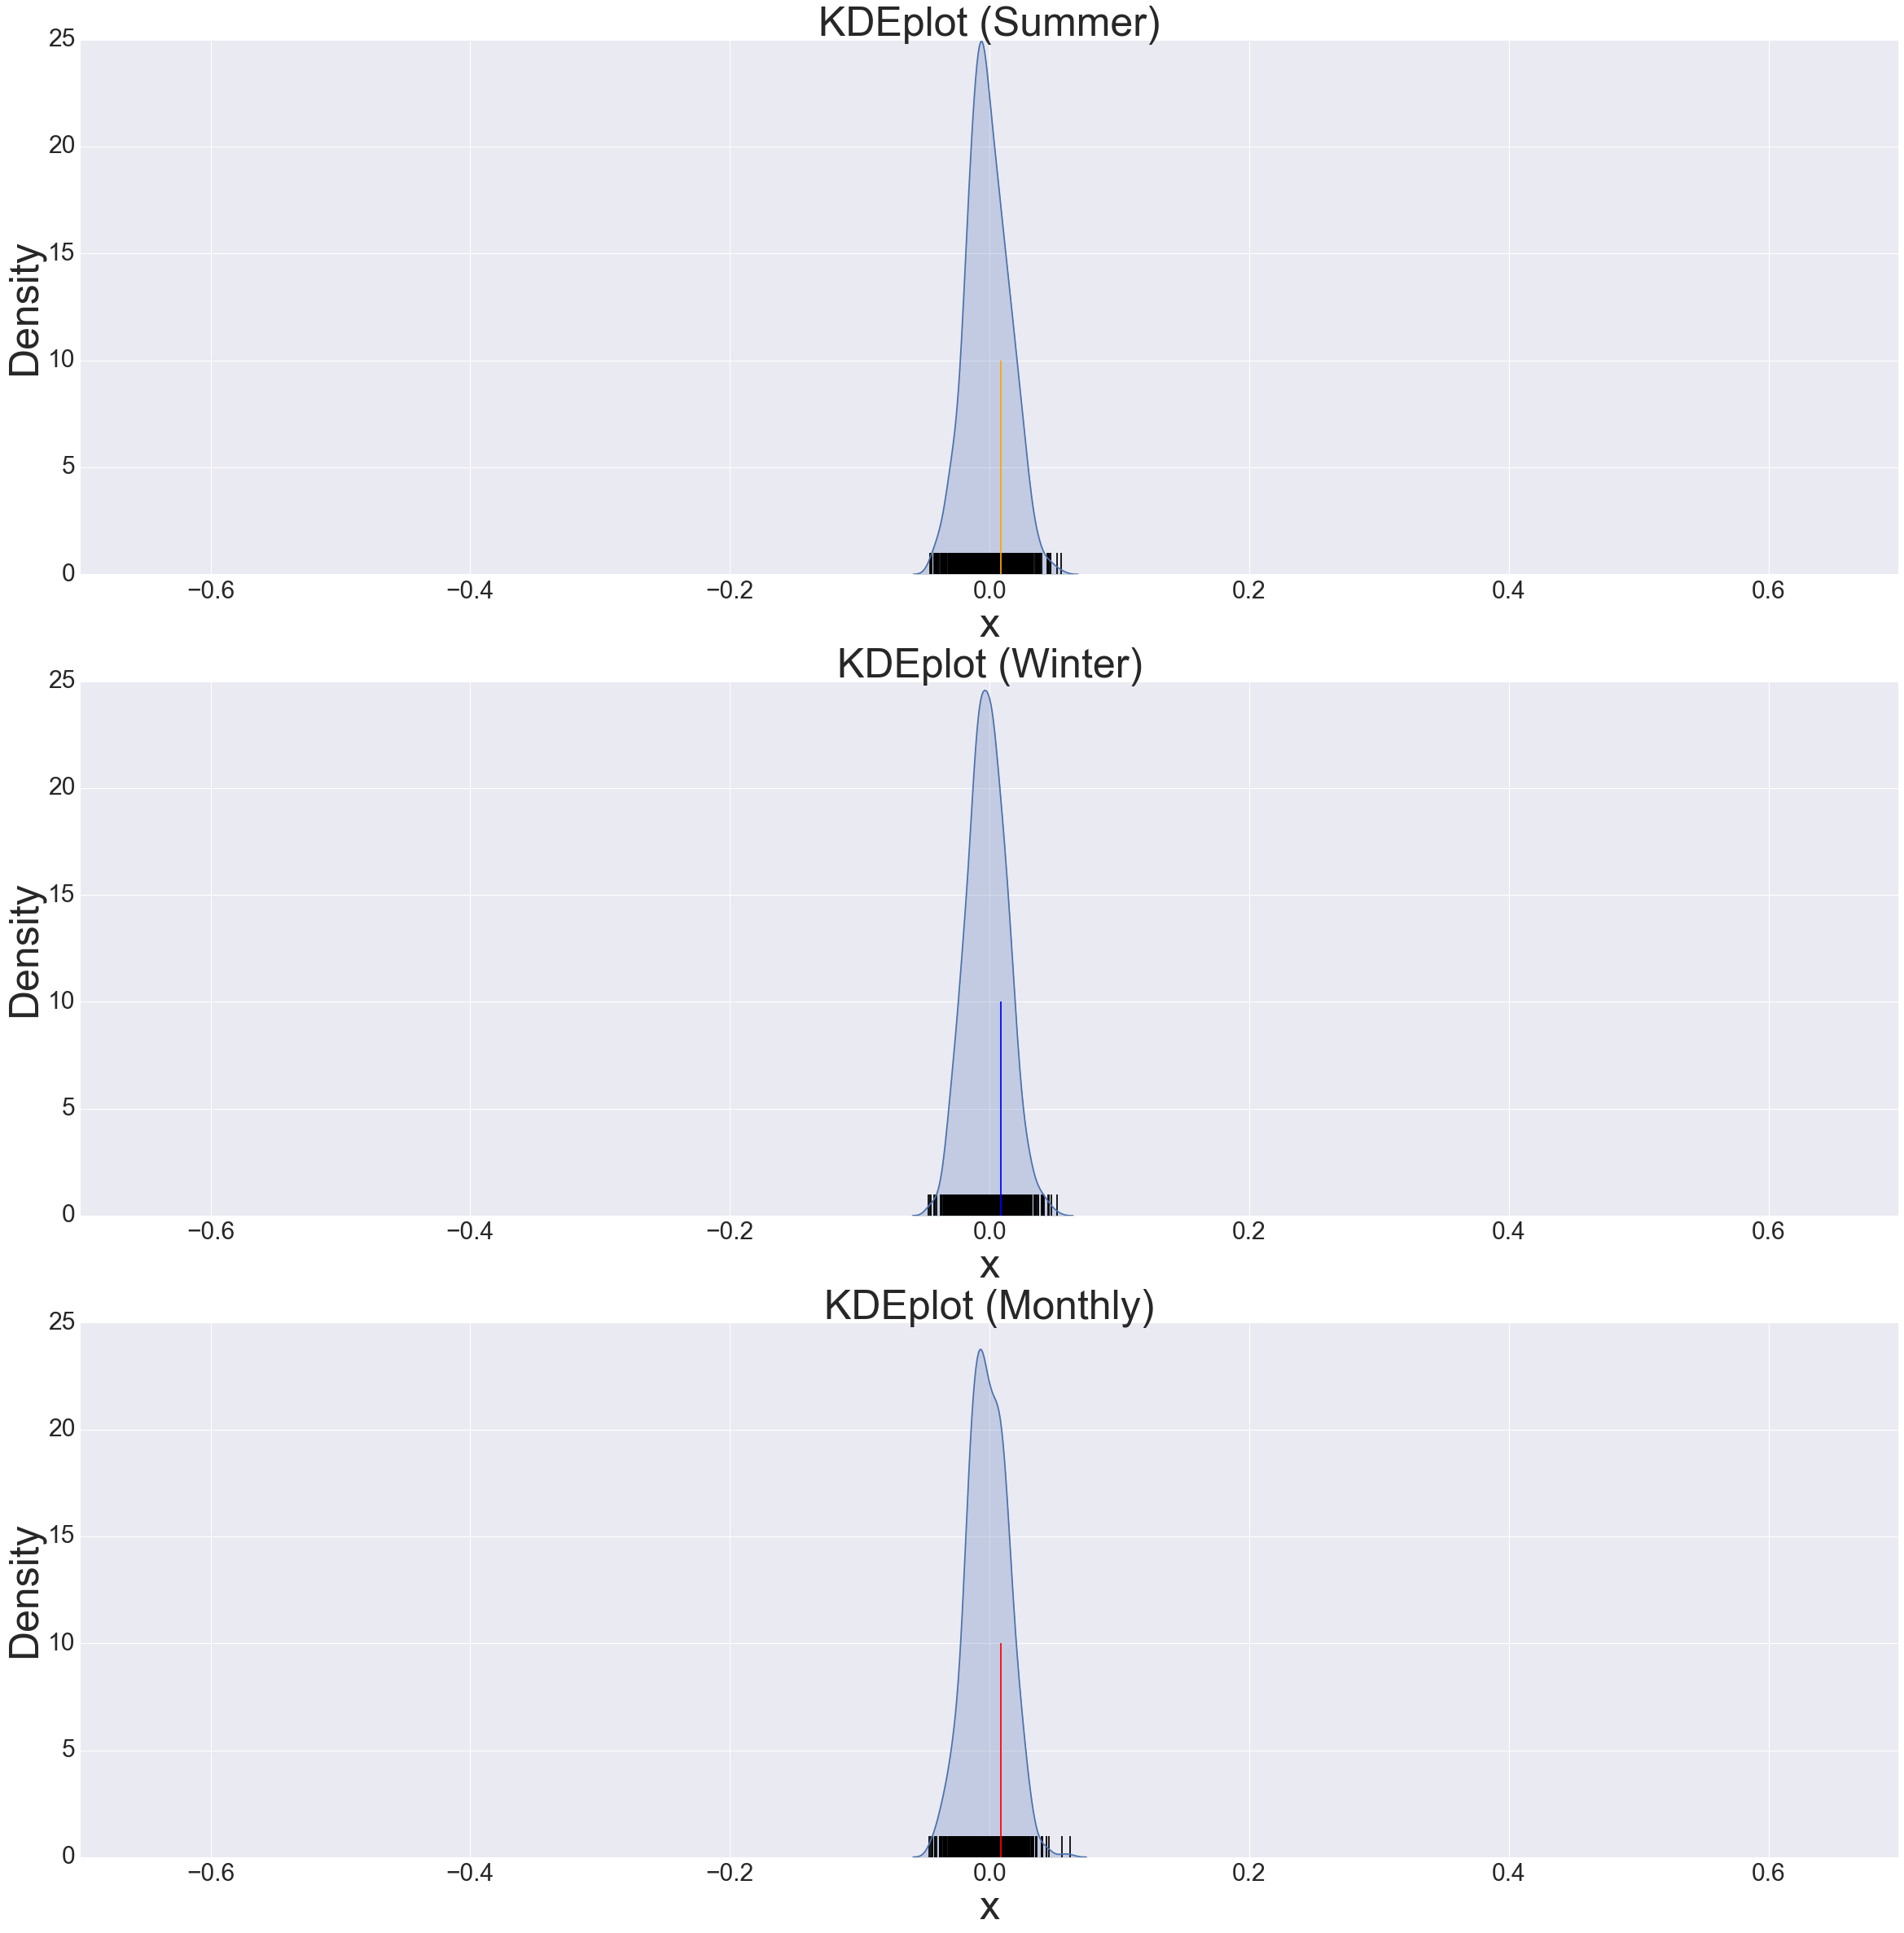

In [247]:
f, ax = plt.subplots(1, figsize=(40, 40))

ax1 = plt.subplot(313)
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('KDEplot (Monthly)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30)
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

ax2 = plt.subplot(312)
sns.kdeplot(I_WinterRide.sim, shade=True)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.EI+.01, 0, 10, 'b')
plt.xlim([-.70, .70])
plt.title('KDEplot (Winter)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

ax3 = plt.subplot(311)
sns.kdeplot(I_SummerRide.sim, shade=True)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.EI+.01, 0, 10, 'orange')
plt.xlim([-.70, .70])
plt.title('KDEplot (Summer)', fontsize=50)
plt.xticks(fontsize = 30) 
plt.yticks(fontsize = 30) 
plt.ylabel('Density', fontsize=50)
plt.xlabel('x', fontsize=50)

## Local  Spatial Autocorrelation

In [249]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)

LMo_WinterRide = ps.Moran_Local(WinterRide, qW_CT,permutations=999)

LMo_SummerRide = ps.Moran_Local(SummerRide, qW_CT,permutations=999)

In [250]:
LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5]

LMo_WinterRide.Is[0:5], LMo_WinterRide.p_sim[0:5]

LMo_SummerRide.Is[0:5], LMo_SummerRide.p_sim[0:5]

(array([-0.        , -0.2391325 ,  0.01474643,  0.00173718,  0.02473794]),
 array([ 0.001,  0.179,  0.326,  0.347,  0.324]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [253]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

Wsigs = WinterRide[LMo_WinterRide.p_sim <= .001]
WW_sigs = WinterRideLag[LMo_WinterRide.p_sim <= .001]
Winsigs = WinterRide[LMo_WinterRide.p_sim > .001]
WW_insigs = WinterRideLag[LMo_WinterRide.p_sim > .001]

Ssigs = SummerRide[LMo_SummerRide.p_sim <= .001]
SW_sigs = SummerRideLag[LMo_SummerRide.p_sim <= .001]
Sinsigs = SummerRide[LMo_SummerRide.p_sim > .001]
SW_insigs = SummerRideLag[LMo_SummerRide.p_sim > .001]

### Plot Signficant LISA

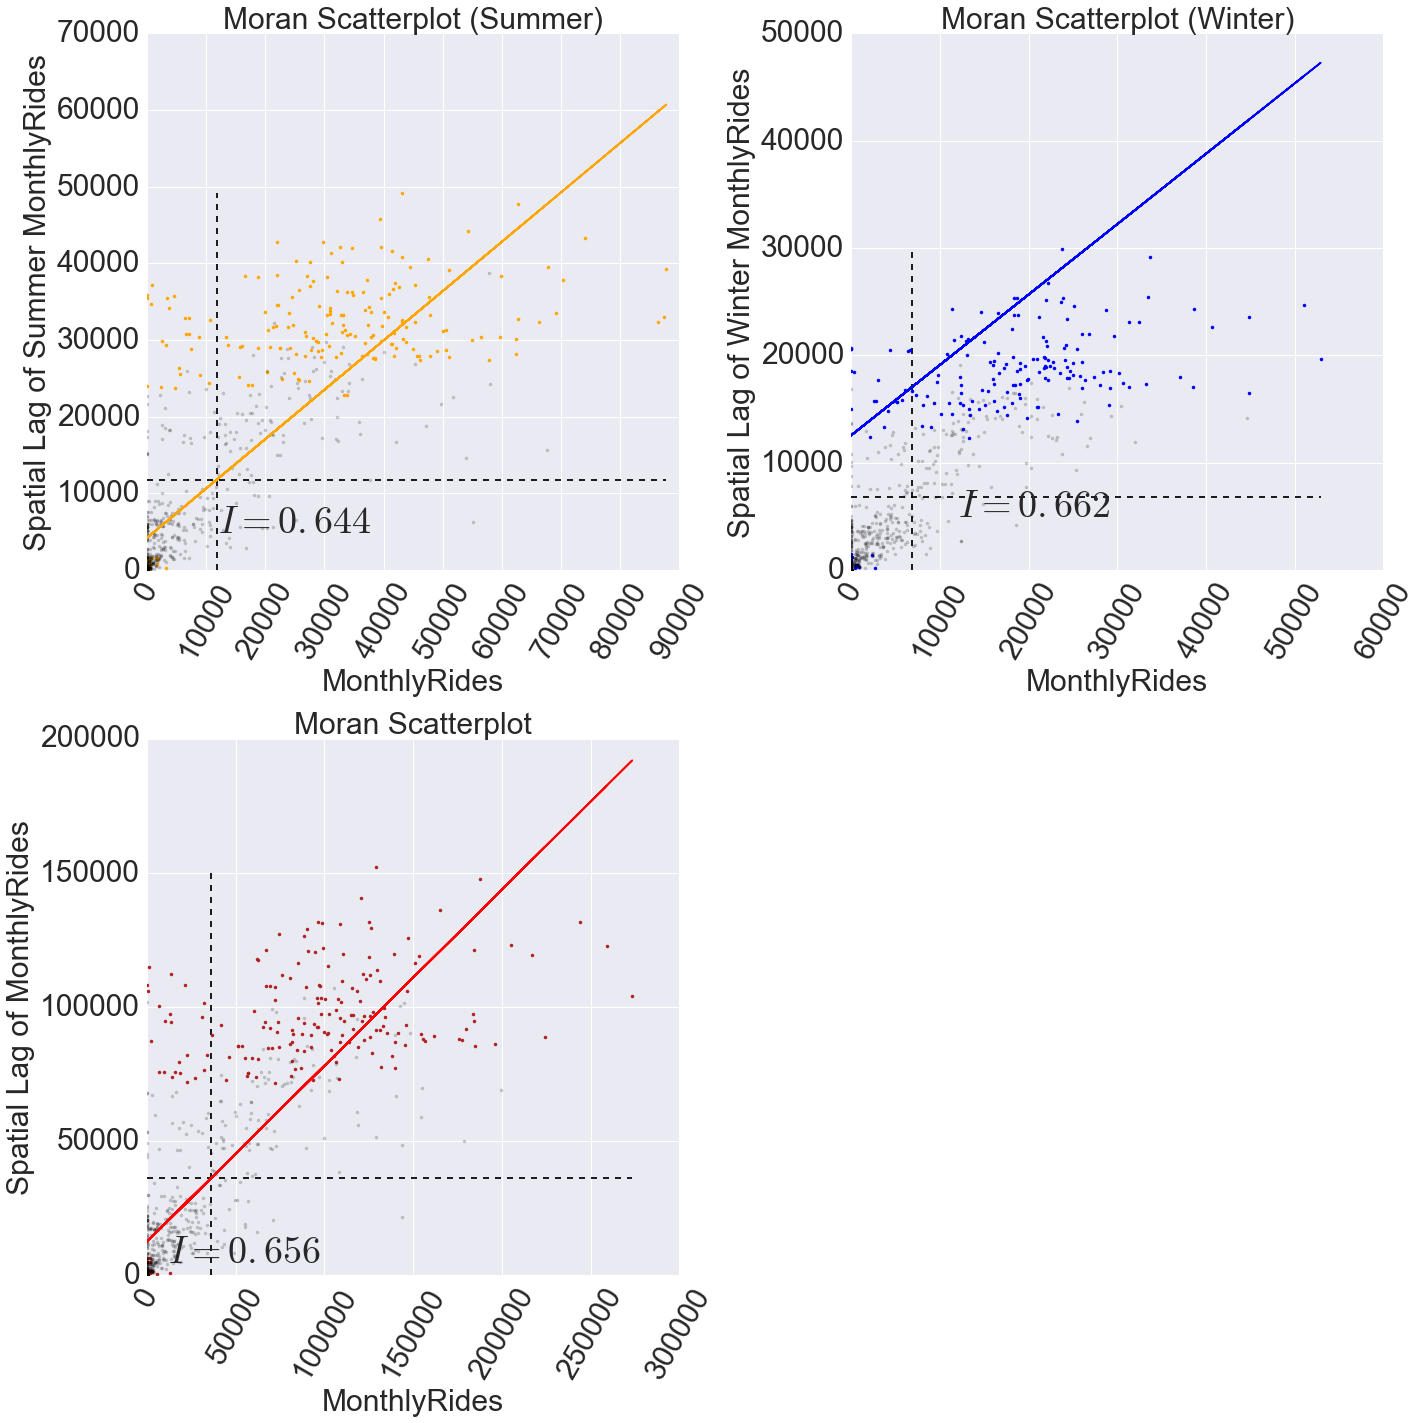

In [269]:
f, ax = plt.subplots(figsize=(20, 20))

ax1 = plt.subplot(223)
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=12000, y=5000, fontsize=38)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot', fontsize = 30)
plt.ylabel('Spatial Lag of MonthlyRides', fontsize = 30)
plt.xlabel('MonthlyRides', fontsize = 30)
plt.xticks(fontsize = 30, rotation=60) 
plt.yticks(fontsize = 30) 
plt.tight_layout()


ax2 = plt.subplot(222)
plt.plot(Wsigs, WW_sigs, '.', color='blue')
plt.plot(Winsigs, WW_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_WinterRide.I, x=12000, y=5000, fontsize=38)

 # dashed vert at mean of the last year's PCI
plt.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(WinterRide, a + b*WinterRide, 'b')
plt.title('Moran Scatterplot (Winter)', fontsize = 30)
plt.ylabel('Spatial Lag of Winter MonthlyRides', fontsize = 30)
plt.xlabel('MonthlyRides', fontsize = 30)
plt.xticks(fontsize = 30, rotation=60) 
plt.yticks(fontsize = 30) 
plt.tight_layout()


ax3 = plt.subplot(221)
plt.plot(Ssigs, SW_sigs, '.', color='orange')
plt.plot(Sinsigs, SW_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_SummerRide.I, x=12000, y=5000, fontsize=38)

 # dashed vert at mean of the last year's PCI
plt.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(SummerRide, a2 + b2*SummerRide, 'orange')
plt.title('Moran Scatterplot (Summer)', fontsize = 30)
plt.ylabel('Spatial Lag of Summer MonthlyRides', fontsize = 30)
plt.xlabel('MonthlyRides', fontsize = 30)
plt.xticks(fontsize = 30, rotation=60) 
plt.yticks(fontsize = 30) 
plt.tight_layout()

### Hot and Cold spots 

In [271]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 193
Number of Coldspots: 241


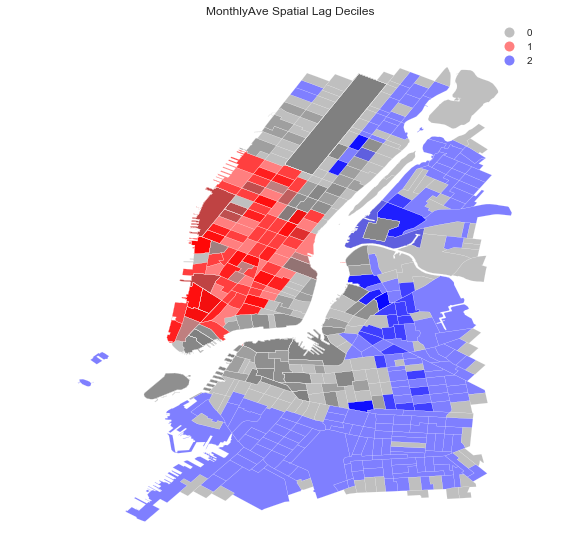

In [272]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles")

In [273]:
Wsig = LMo_WinterRide.p_sim < 0.01
#boundary of signficants
w_hotspots = LMo_WinterRide.q==1 * Wsig
w_coldspots = LMo_WinterRide.q==3 * Wsig
print "Number of Hotspots (Winter):", w_hotspots.sum()
print "Number of Coldspots (Winter):", w_coldspots.sum()

Ssig = LMo_SummerRide.p_sim < 0.01
#boundary of signficants
s_hotspots = LMo_SummerRide.q==1 * Ssig
s_coldspots = LMo_SummerRide.q==3 * Ssig
print "Number of Hotspots (Summer):", s_hotspots.sum()
print "Number of Coldspots (Summer):", s_coldspots.sum()

Number of Hotspots (Winter): 193
Number of Coldspots (Winter): 214
Number of Hotspots (Summer): 189
Number of Coldspots (Summer): 236


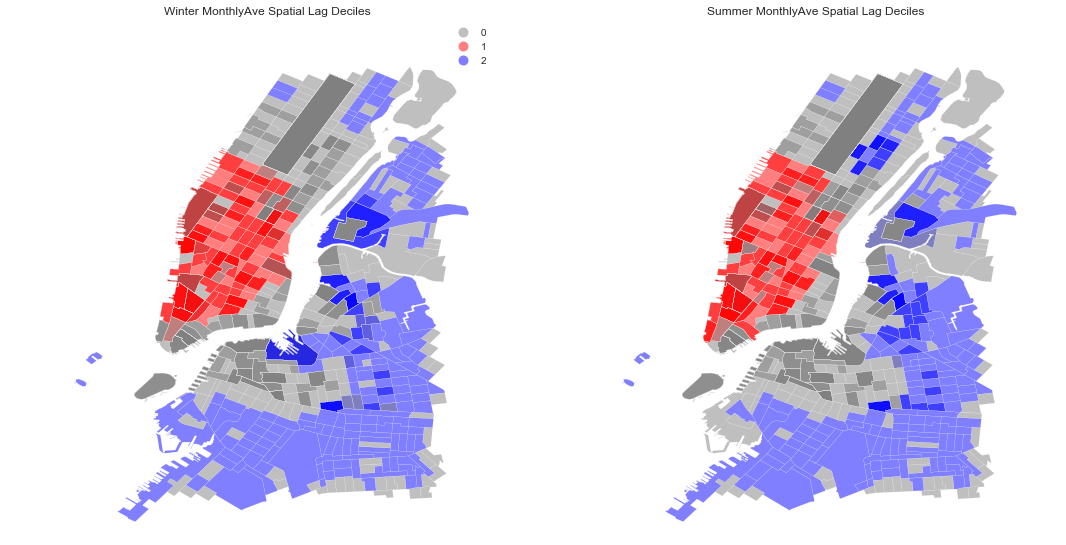

In [274]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
w_hotcold = w_hotspots*1 + w_coldspots*2
s_hotcold = s_hotspots*1 + s_coldspots*2
#if its true, it will be 1 * 1
#if its true, it will be 1 * 2
# if false, =0
# so either get 0, 1, 2

f, ax = plt.subplots(figsize=(18, 9))

ax1 = plt.subplot(121)
ct_shape_WinterAve_Zoom.assign(cl=w_hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.set_axis_off()
plt.title("Winter MonthlyAve Spatial Lag Deciles")

ax2 = plt.subplot(122)
ct_shape_SummerAve_Zoom.assign(cl=s_hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=False)
ax2.set_axis_off()
plt.title("Summer MonthlyAve Spatial Lag Deciles")